## Problem Statement
### Predict the Burned Area of Forest Fire with Neural Networks.

In [1]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset using pandas
forest=pd.read_csv('forestfires.csv')

## Performing EDA

In [3]:
#displaying  first 5 records 
forest.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
#displaying last 5 records
forest.tail()

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[5 rows x 31 columns]

In [5]:
#shape of dataset
forest.shape   

(517, 31)

Dataset has `517` rows and `31` columns

In [6]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
#creating copy of original dataset so if we made any changes it won't effect our original datset
ff_data = forest.copy()

In [8]:
ff_data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [9]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<h4>The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.</h4>

In [10]:
ff_data.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

<h4>The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.</h4>

In [11]:
ff_data.ndim

2

In [12]:
ff_data.axes

[RangeIndex(start=0, stop=517, step=1),
 Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
        'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
        'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
        'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
        'monthoct', 'monthsep', 'size_category'],
       dtype='object')]

#### axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

In [13]:
#checking unique values
ff_data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

<Figure size 1000x1500 with 0 Axes>

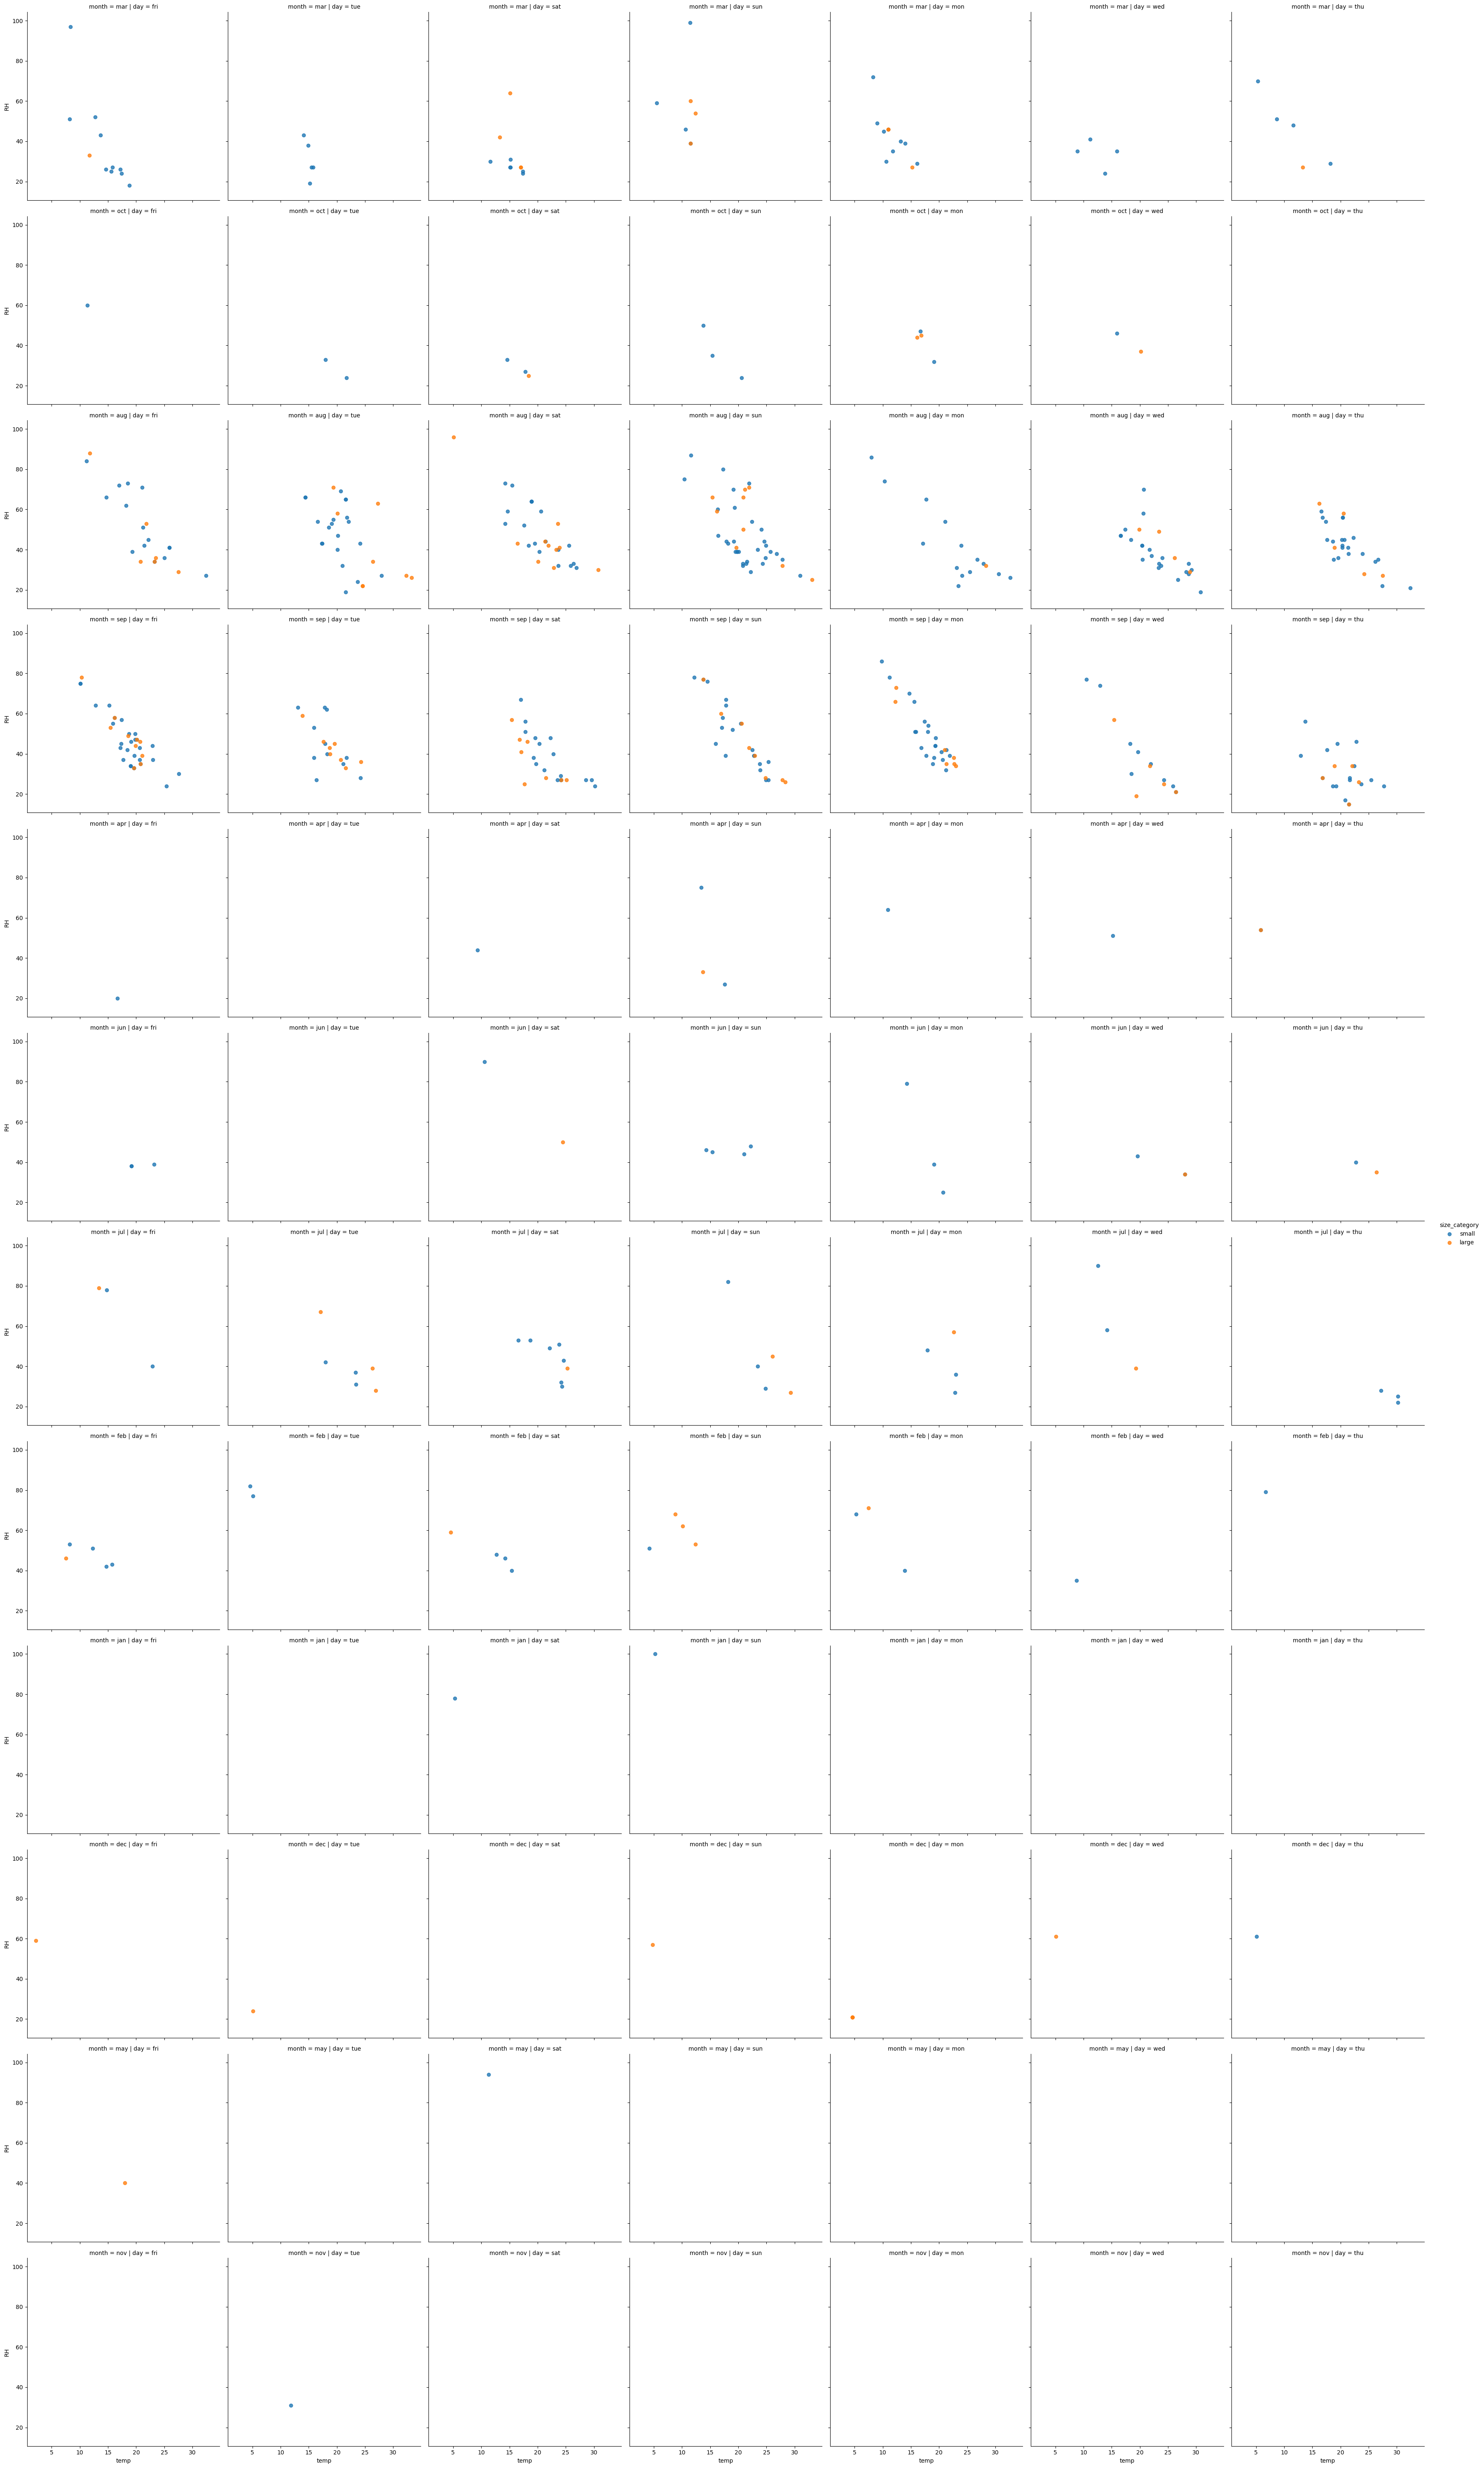

In [14]:
plt.figure(figsize=(10,15))
sns.lmplot(x='temp',y='RH',data=ff_data,hue='size_category' ,fit_reg=False,col='day',row='month')
plt.show()

<h4>Observations:</h4>
1. As the temperature increases the RH got decrease<br>
2. The more numbers of fire got in the months of March, August and September<br>
3. In the month of March friday as the temperature is getting increases the Rh getting down and the fires contains small<br>
4. The month of March has high rate of getting fires <br>
5. As looking to graph we can assume that as increase in the temperatures if RH aslo gets incresed there are less chances of getting fires 

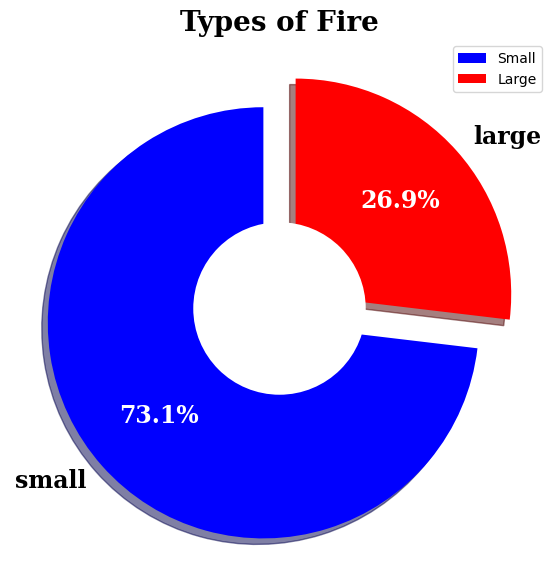

In [15]:
label_data=ff_data['size_category'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Types of Fire',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Small','Large'],loc="upper right")
plt.show()

### Small fires took place more in numbers comapered to large fires

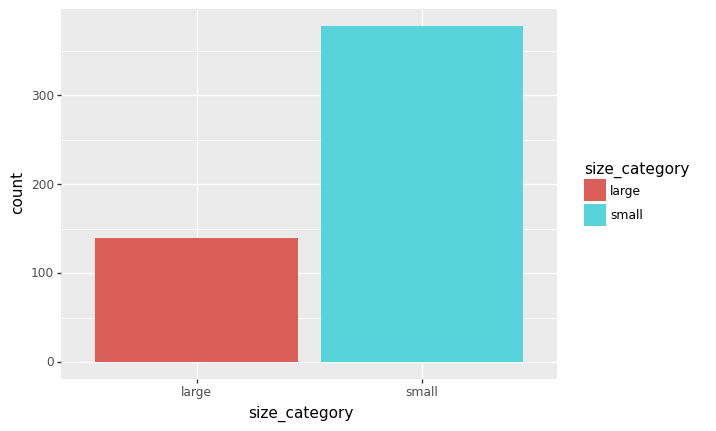

<ggplot: (176449401480)>

In [16]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(ff_data) + aes(x="size_category",fill='size_category') + geom_bar()

### Barchart representation  for scale of Fires

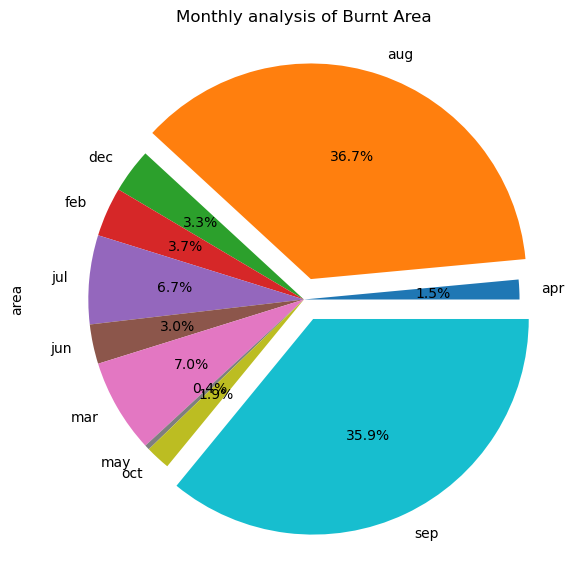

In [17]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=ff_data[ff_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of Burnt Area',figsize=(7,7),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

<h4>Observations:</h4>
1. In the month of <b>August</b> due to more fires in this month there was high burnt area upto 37% of land out of 100%<br>
2. Followed to August, <b>September</b> got 36% of land burnt due to fires<br>
3. The lowest area got burnt in the month of may<br>
4. As we can assume that during the month of August and September there was an loss of soil fertility<br>
5. By looking to graph we can predict that we should be prepared with fire extinguishers equipments before the august month

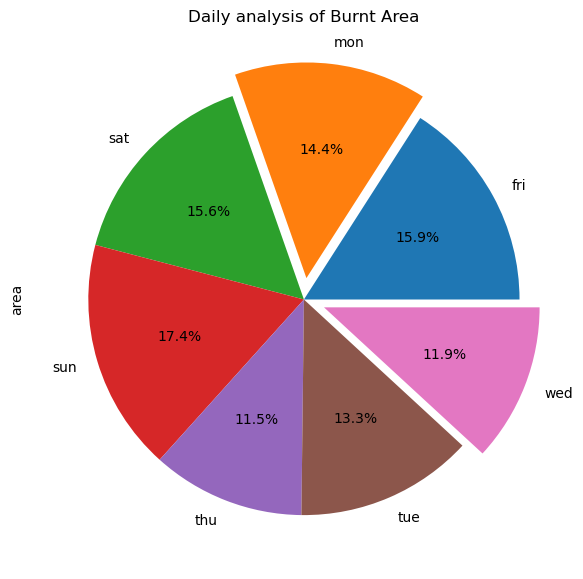

In [18]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=ff_data[ff_data['area']>0]
areaburnt.groupby('day')['area'].agg('count').plot(kind='pie',title='Daily analysis of Burnt Area',figsize=(7,7),explode=[0,0.1,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

<h4>Observations:</h4>
1. The highest burnt area is in <b>Sunday</b><br>
2. Th lowest burnt area is got in <b>Thursday </b><br>

In [19]:
ff_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

Here as we can see that the columns `month` and `day` has been converted into dummies so now we do not required it so we will drop them

In [20]:
ff_data.pop('month') #pop is used to remove coloumns
ff_data.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [21]:
ff_data.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthfeb  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 29 columns]

In [22]:
#Checking for missing data
NAs = pd.concat([ff_data.isnull().sum()], axis=1, keys=["Total NA"])
NAs[NAs.sum(axis=1) > 0]

Empty DataFrame
Columns: [Total NA]
Index: []

#### There is no any missing value in the dataset 

In [23]:
#checking for duplication of data
ff_data[ff_data.duplicated()].shape

(8, 29)

In [24]:
#displying duplicate values
ff_data[ff_data.duplicated()]

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
53   92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00       0  ...   
100  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00       0  ...   
215  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66       0  ...   
303  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00       1  ...   
426  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0   0.00       0  ...   
461  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0   0.00       0  ...   
501  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00       0  ...   
508  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00       1  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         0         1         0         0   
303         0         0         0         1         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthoct  monthsep  size_category  
53          0         0          small  
100         0         0          small  
215         0         0          large  
303         0         0          small  
426         0         0          small  
461         0         0          small  
501         0         0          small  
508         0         0          small  

[8 rows x 29 columns]

In [25]:
#droping the duplicate rows
ff_data=ff_data.drop_duplicates()

In [26]:
#again checking for duplication of data
ff_data[ff_data.duplicated()].shape

(0, 29)

#### Now there is no any duplicate values

In [27]:
ff_data['size_category']=ff_data['size_category'].apply(lambda x: 1 if x=='large' else 0)

As it's more efficient to work on dataset which contains features in number format.So, we are converting the dependent variable in categorical using lambda function.

In [28]:
ff_data.tail()

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
512         0         0              1  
513         0         0              1  
514         0         0              1  
515         0         0              0  
516         0         0              0  

[5 rows x 29 columns]

In [29]:
features = ['monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul','monthjun', 
            'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']

In [30]:
list(enumerate(features))

[(0, 'monthapr'),
 (1, 'monthaug'),
 (2, 'monthdec'),
 (3, 'monthfeb'),
 (4, 'monthjan'),
 (5, 'monthjul'),
 (6, 'monthjun'),
 (7, 'monthmar'),
 (8, 'monthmay'),
 (9, 'monthnov'),
 (10, 'monthoct'),
 (11, 'monthsep')]

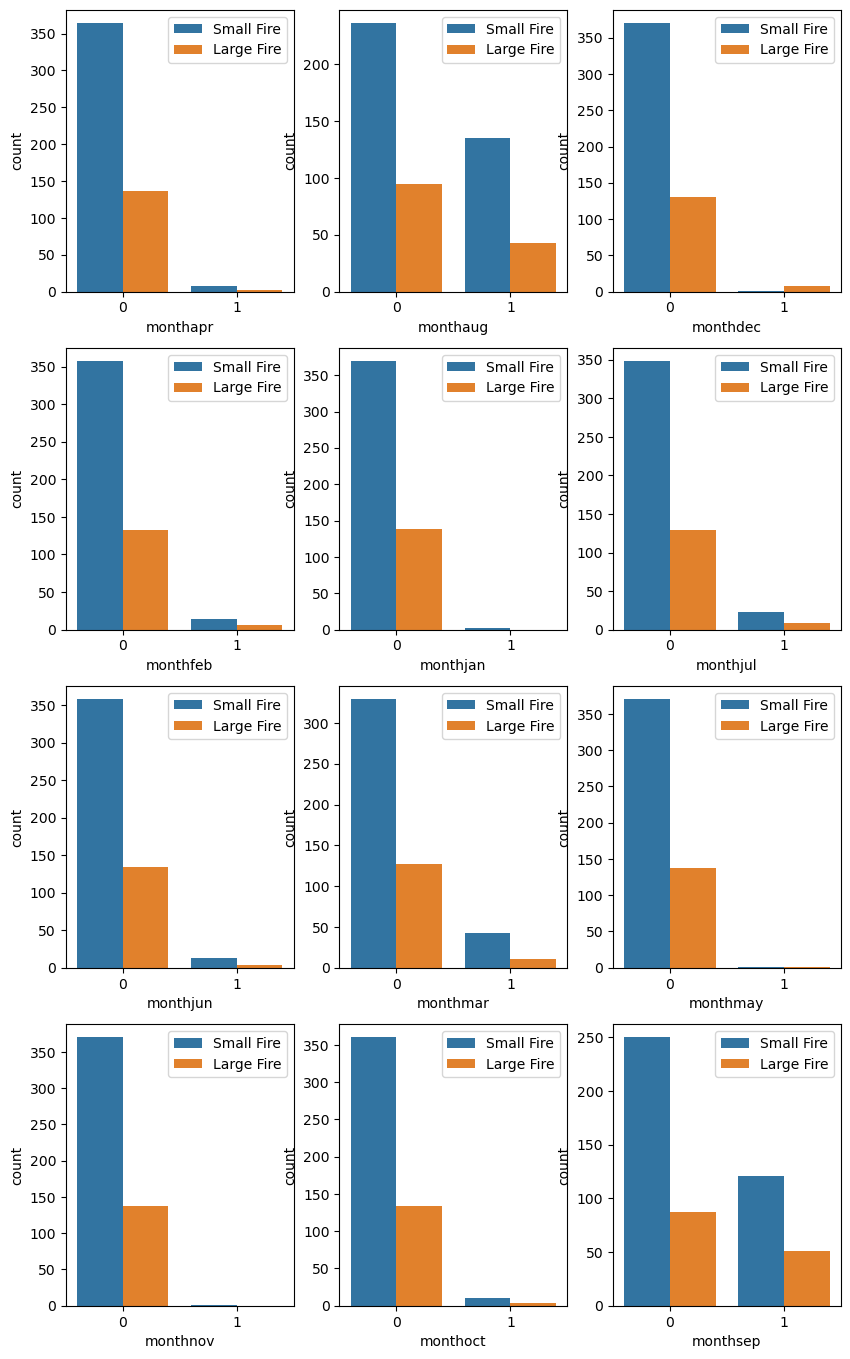

In [31]:
plt.figure(figsize=(10,30))
for i in enumerate(features):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(i[1],hue='size_category',data=ff_data)
    plt.legend(["Small Fire","Large Fire"])
plt.show()    

<h4>Observations:</h4>
1. In the months of  February, March, April, May, June, July, August, September, October and December there was an large fire has taken place<br>
2. While in January and November small fires took place which where less harmful<br>
3. In August and September there is highly forest got small and large fires<br>
4. So,we can assume that in these this two months we should be well prepared with fire extinguisher equipments

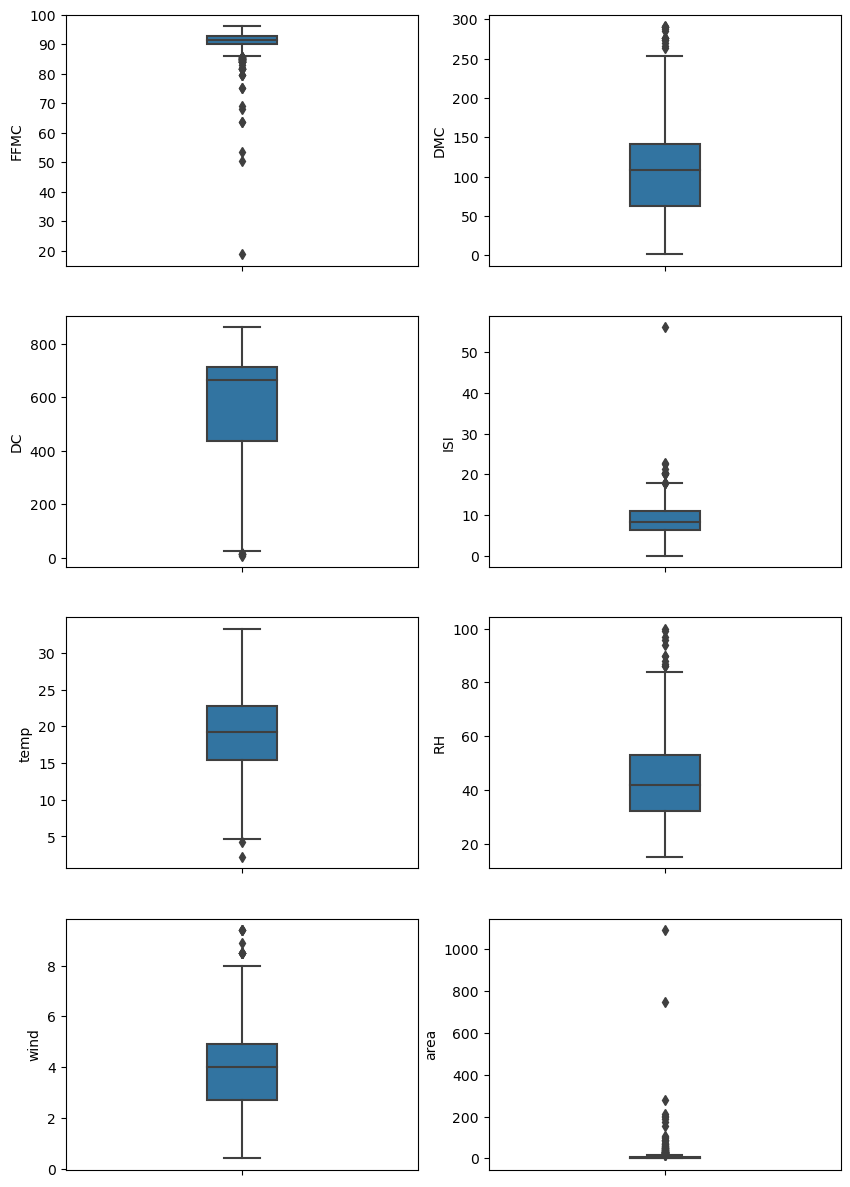

In [32]:
# Drawing boxplot for indepent variables with continuous values
cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col, data=ff_data,width=0.2)
    i+=1
plt.show()

<h4>Observations:</h4>
1. DC has highest mean among the other continues independent variables<br>
2. wind has lowest mean<br>
3. as DC has high mean there is higb variance in the data points but having less numbers of outliers<br>
4. IQR range is very less in FFMC having more number's of outliers 

<Figure size 640x480 with 0 Axes>

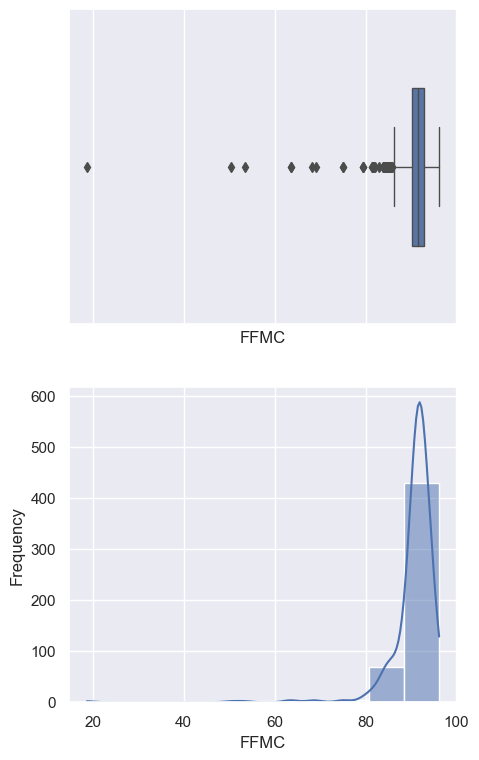

<Figure size 500x900 with 0 Axes>

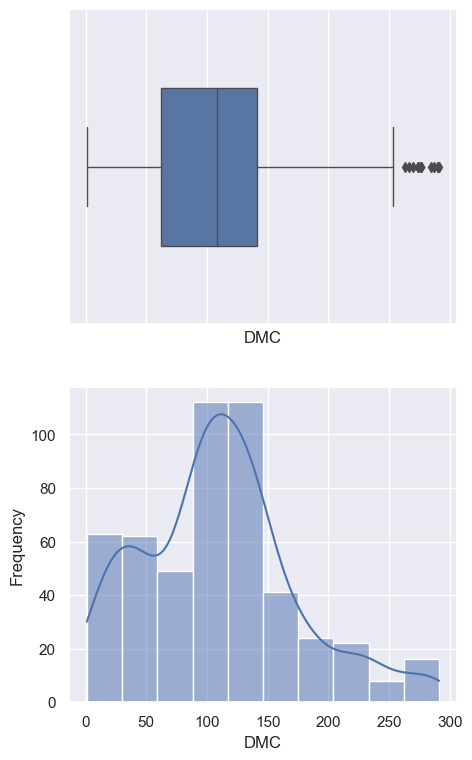

<Figure size 500x900 with 0 Axes>

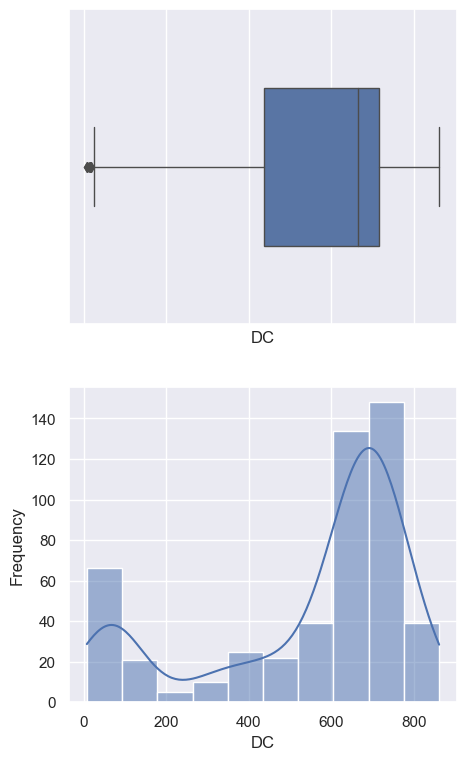

<Figure size 500x900 with 0 Axes>

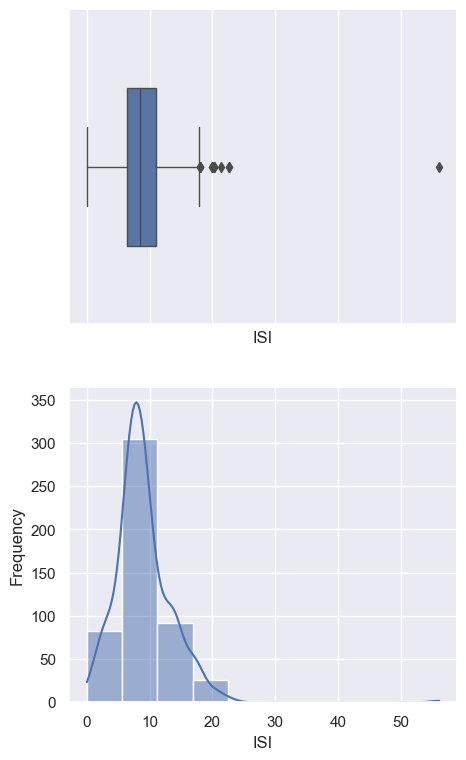

<Figure size 500x900 with 0 Axes>

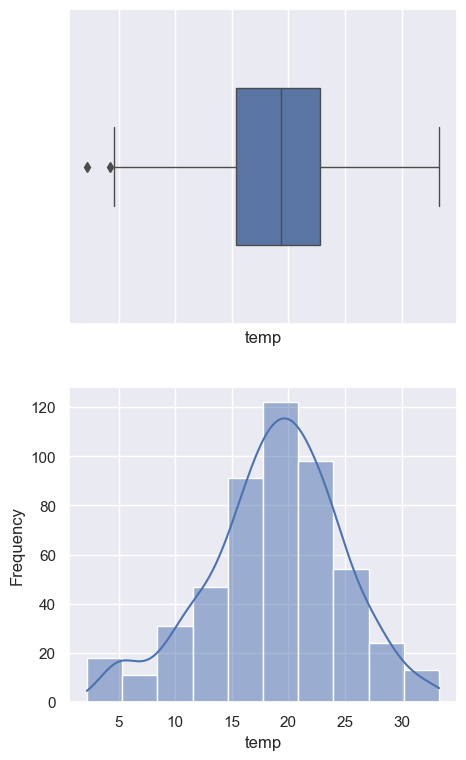

<Figure size 500x900 with 0 Axes>

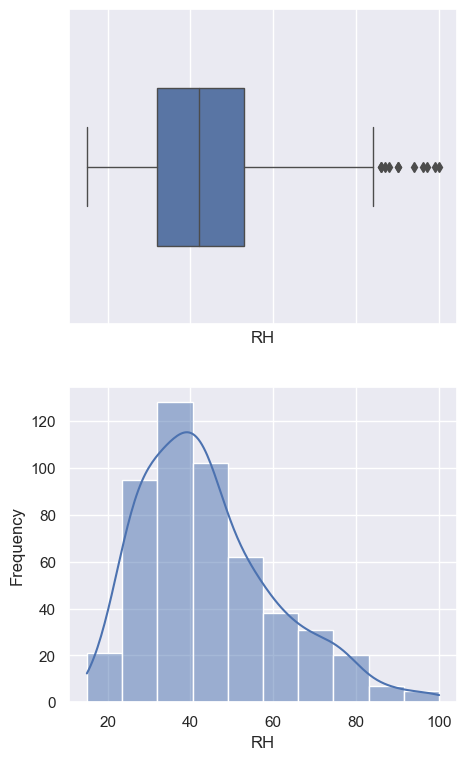

<Figure size 500x900 with 0 Axes>

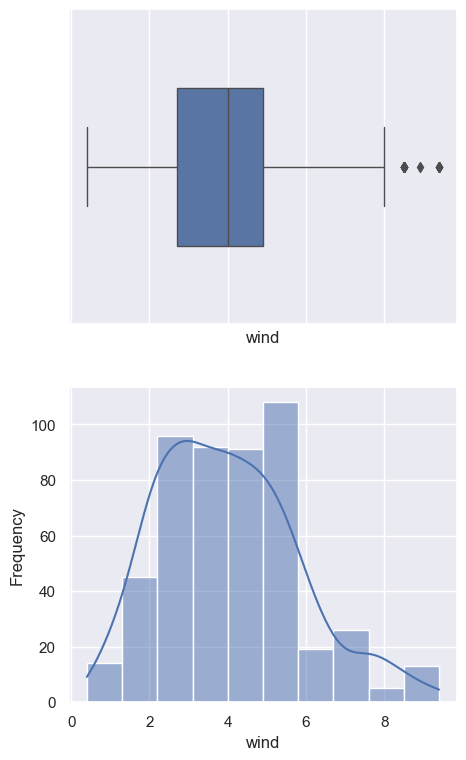

<Figure size 500x900 with 0 Axes>

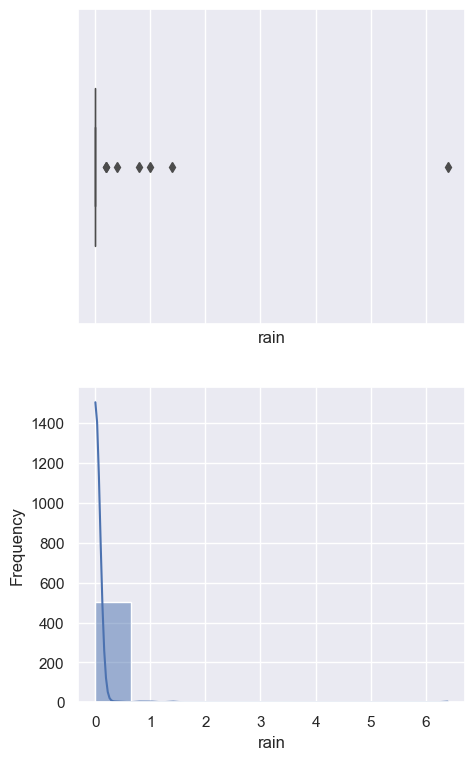

<Figure size 500x900 with 0 Axes>

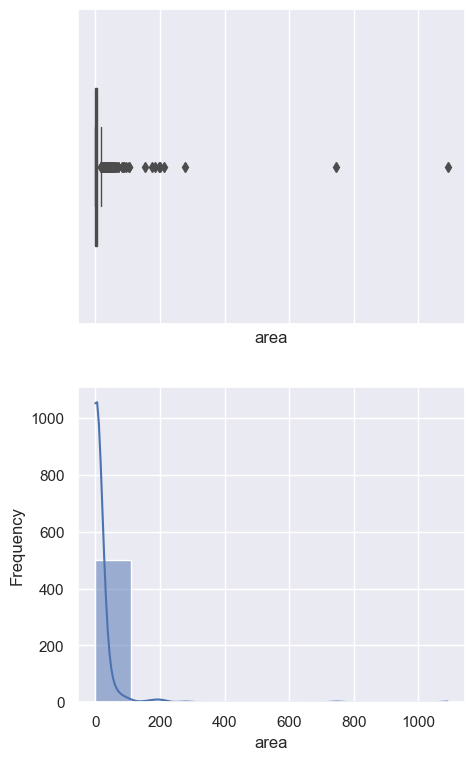

<Figure size 500x900 with 0 Axes>

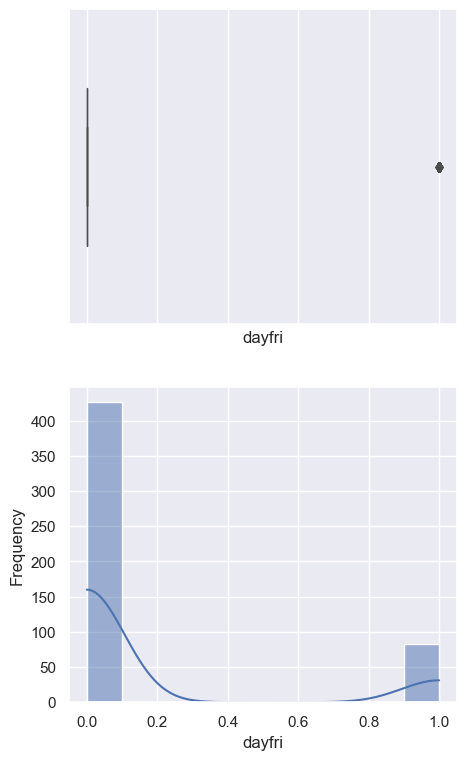

<Figure size 500x900 with 0 Axes>

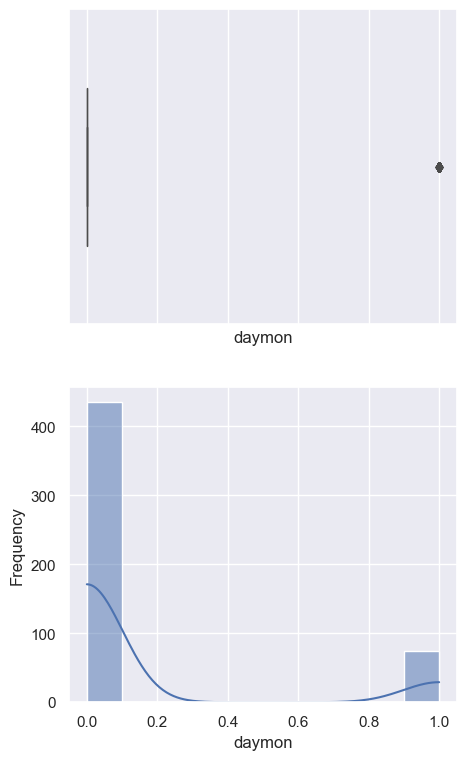

<Figure size 500x900 with 0 Axes>

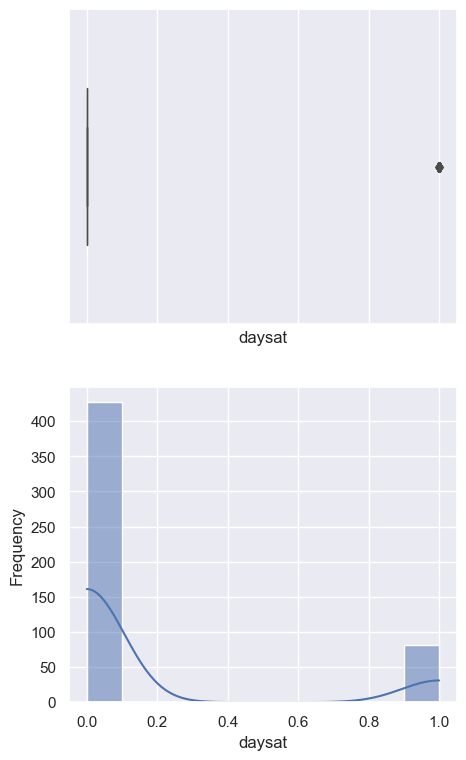

<Figure size 500x900 with 0 Axes>

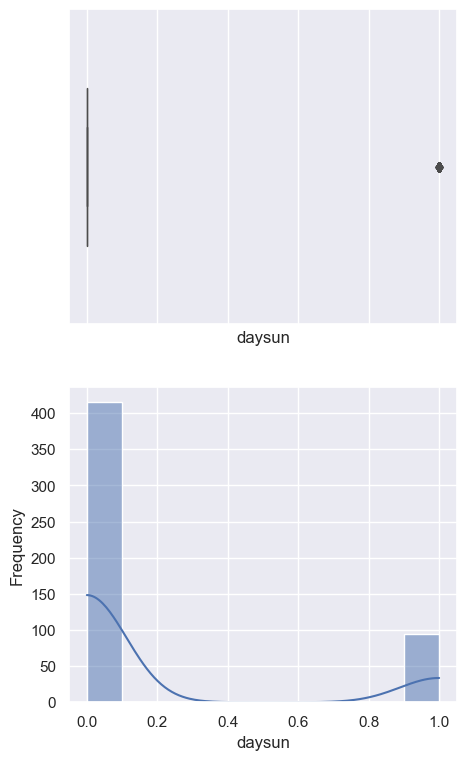

<Figure size 500x900 with 0 Axes>

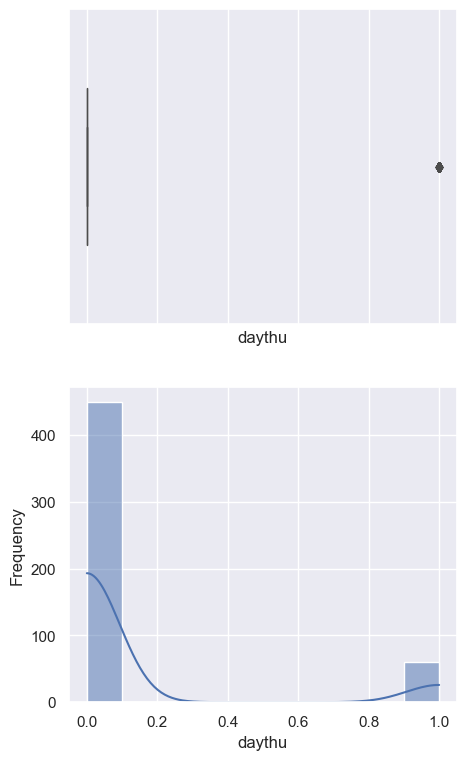

<Figure size 500x900 with 0 Axes>

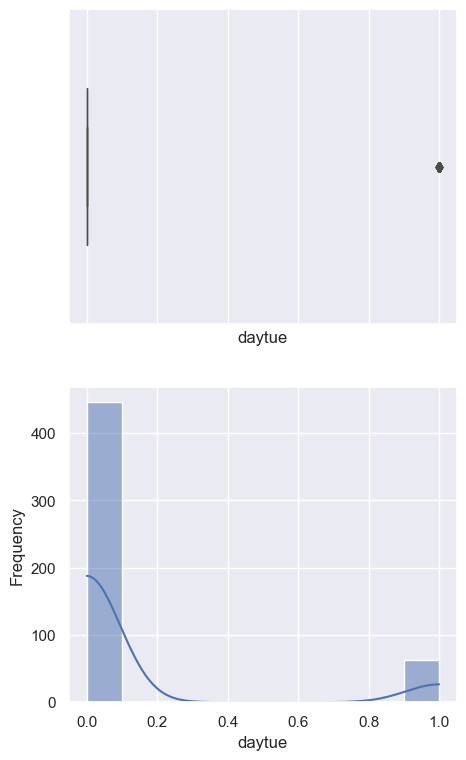

<Figure size 500x900 with 0 Axes>

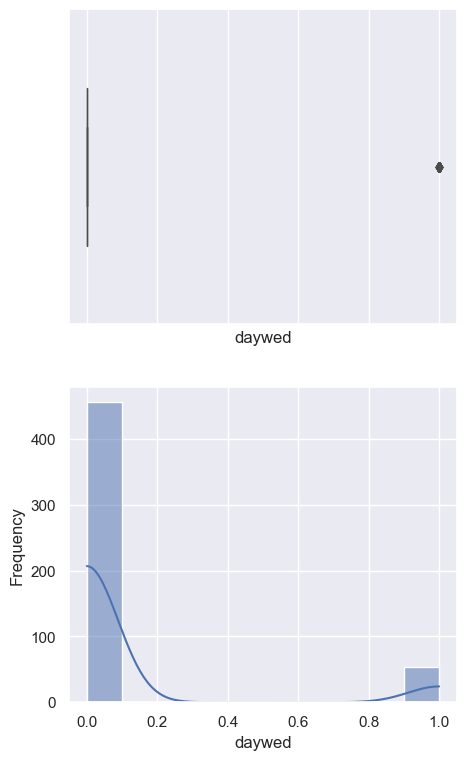

<Figure size 500x900 with 0 Axes>

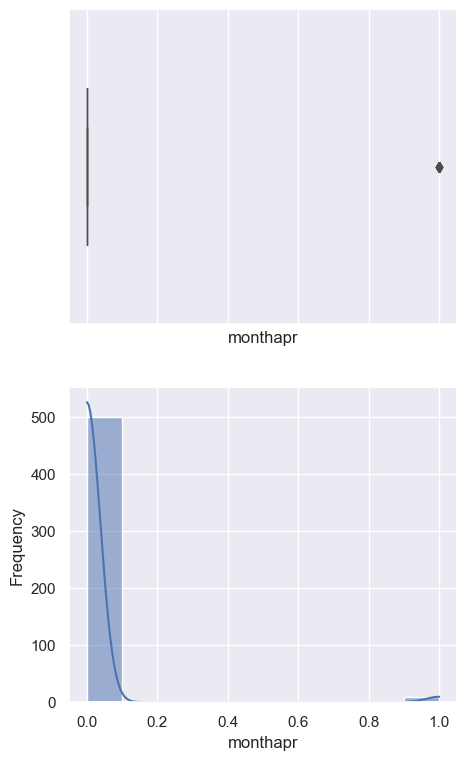

<Figure size 500x900 with 0 Axes>

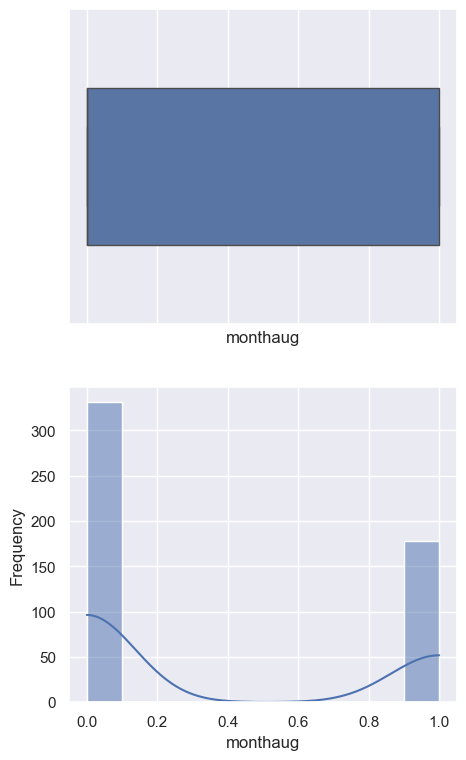

<Figure size 500x900 with 0 Axes>

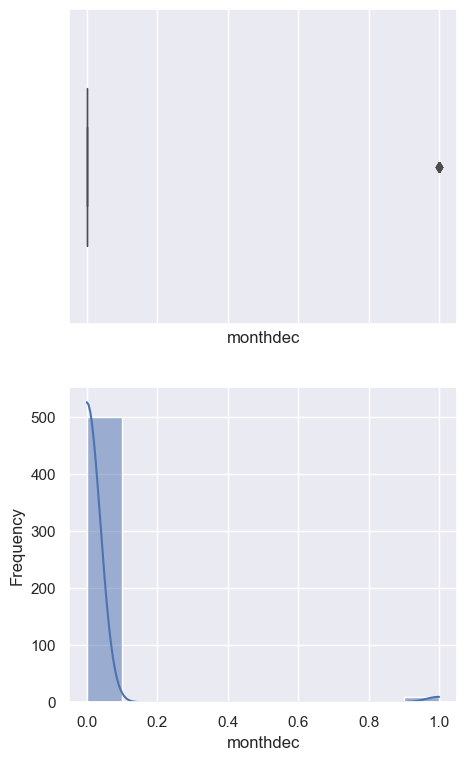

<Figure size 500x900 with 0 Axes>

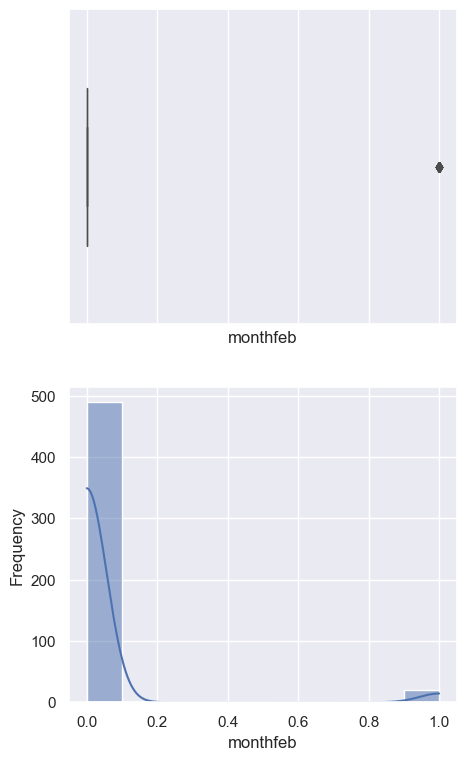

<Figure size 500x900 with 0 Axes>

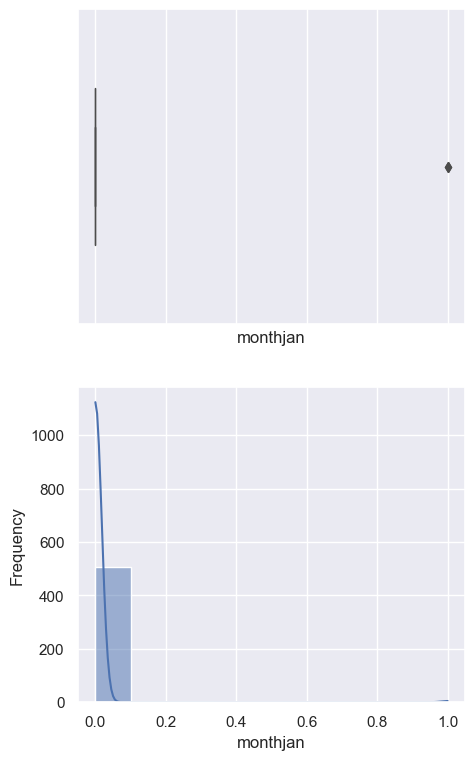

<Figure size 500x900 with 0 Axes>

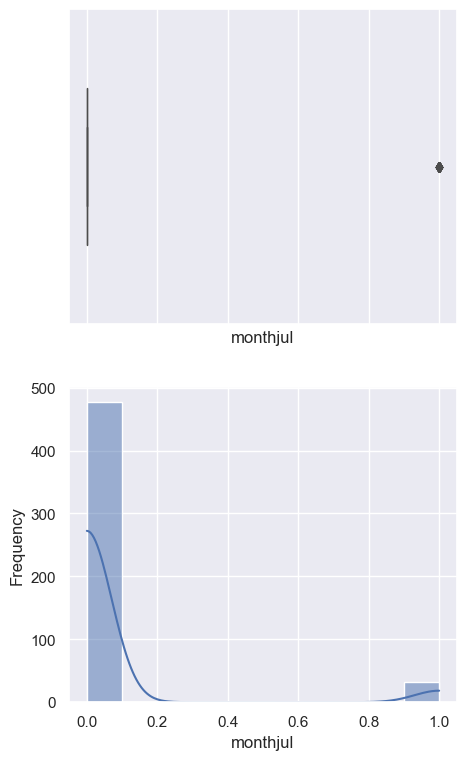

<Figure size 500x900 with 0 Axes>

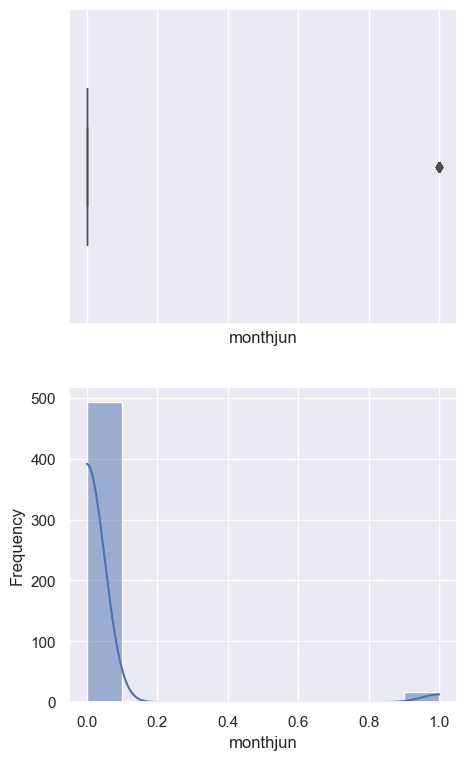

<Figure size 500x900 with 0 Axes>

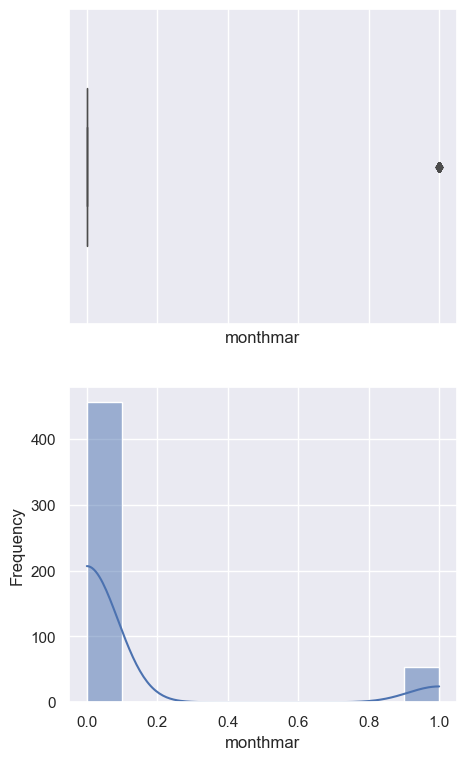

<Figure size 500x900 with 0 Axes>

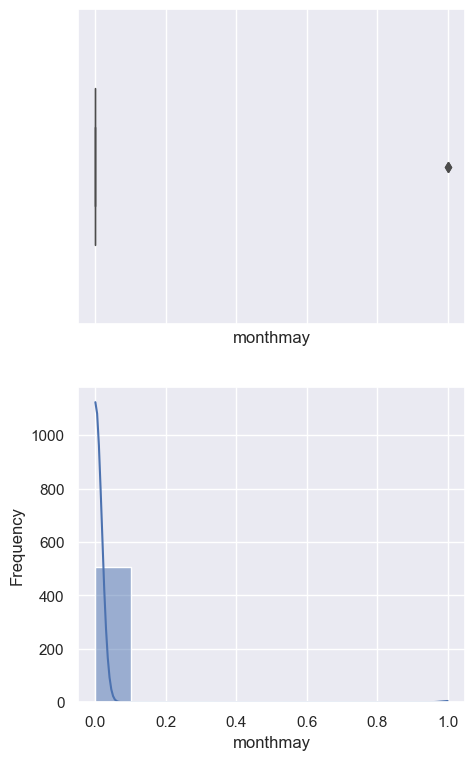

<Figure size 500x900 with 0 Axes>

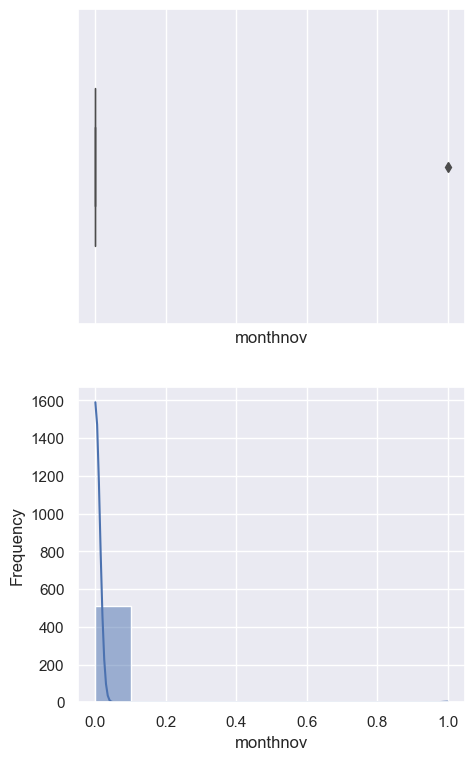

<Figure size 500x900 with 0 Axes>

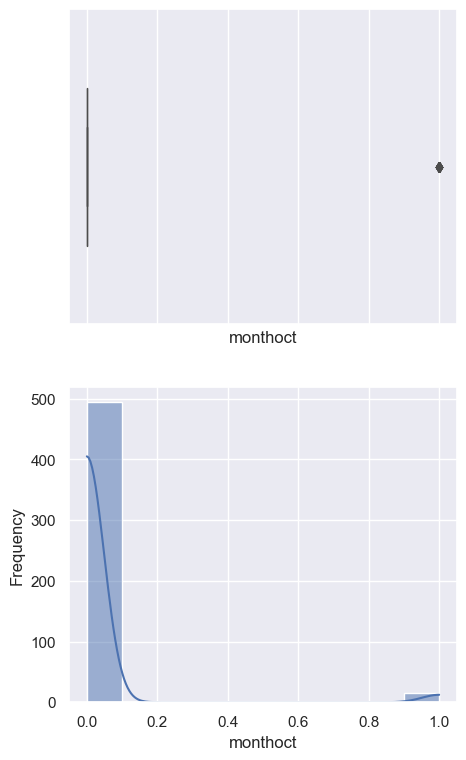

<Figure size 500x900 with 0 Axes>

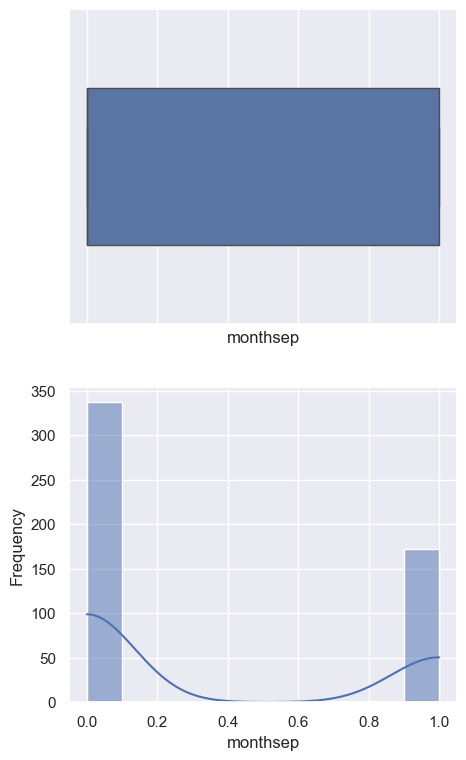

<Figure size 500x900 with 0 Axes>

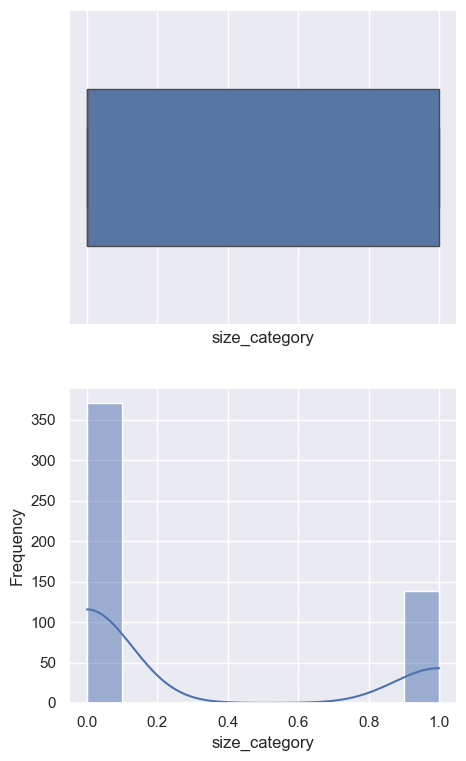

In [33]:
#detecting outliers 
# a for loop to automate our task
for i in ff_data.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(5,9)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(ff_data[i], ax=ax_box , linewidth= 1.0,width=0.5)
    sns.histplot(ff_data[i], ax=ax_hist , bins = 10,kde=True)

<h4>Observations:</h4>
1. the feature Temperature has <b>Normal distribution</b> means its mean,mode and median will be same<br>
2. DMC and RH has <b>Postitive skewness</b> where mean is greater than median,and median is greater than mode<br>
3. DC and FFMC has <b>Negative skewness</b> where mean is lower than median and mean

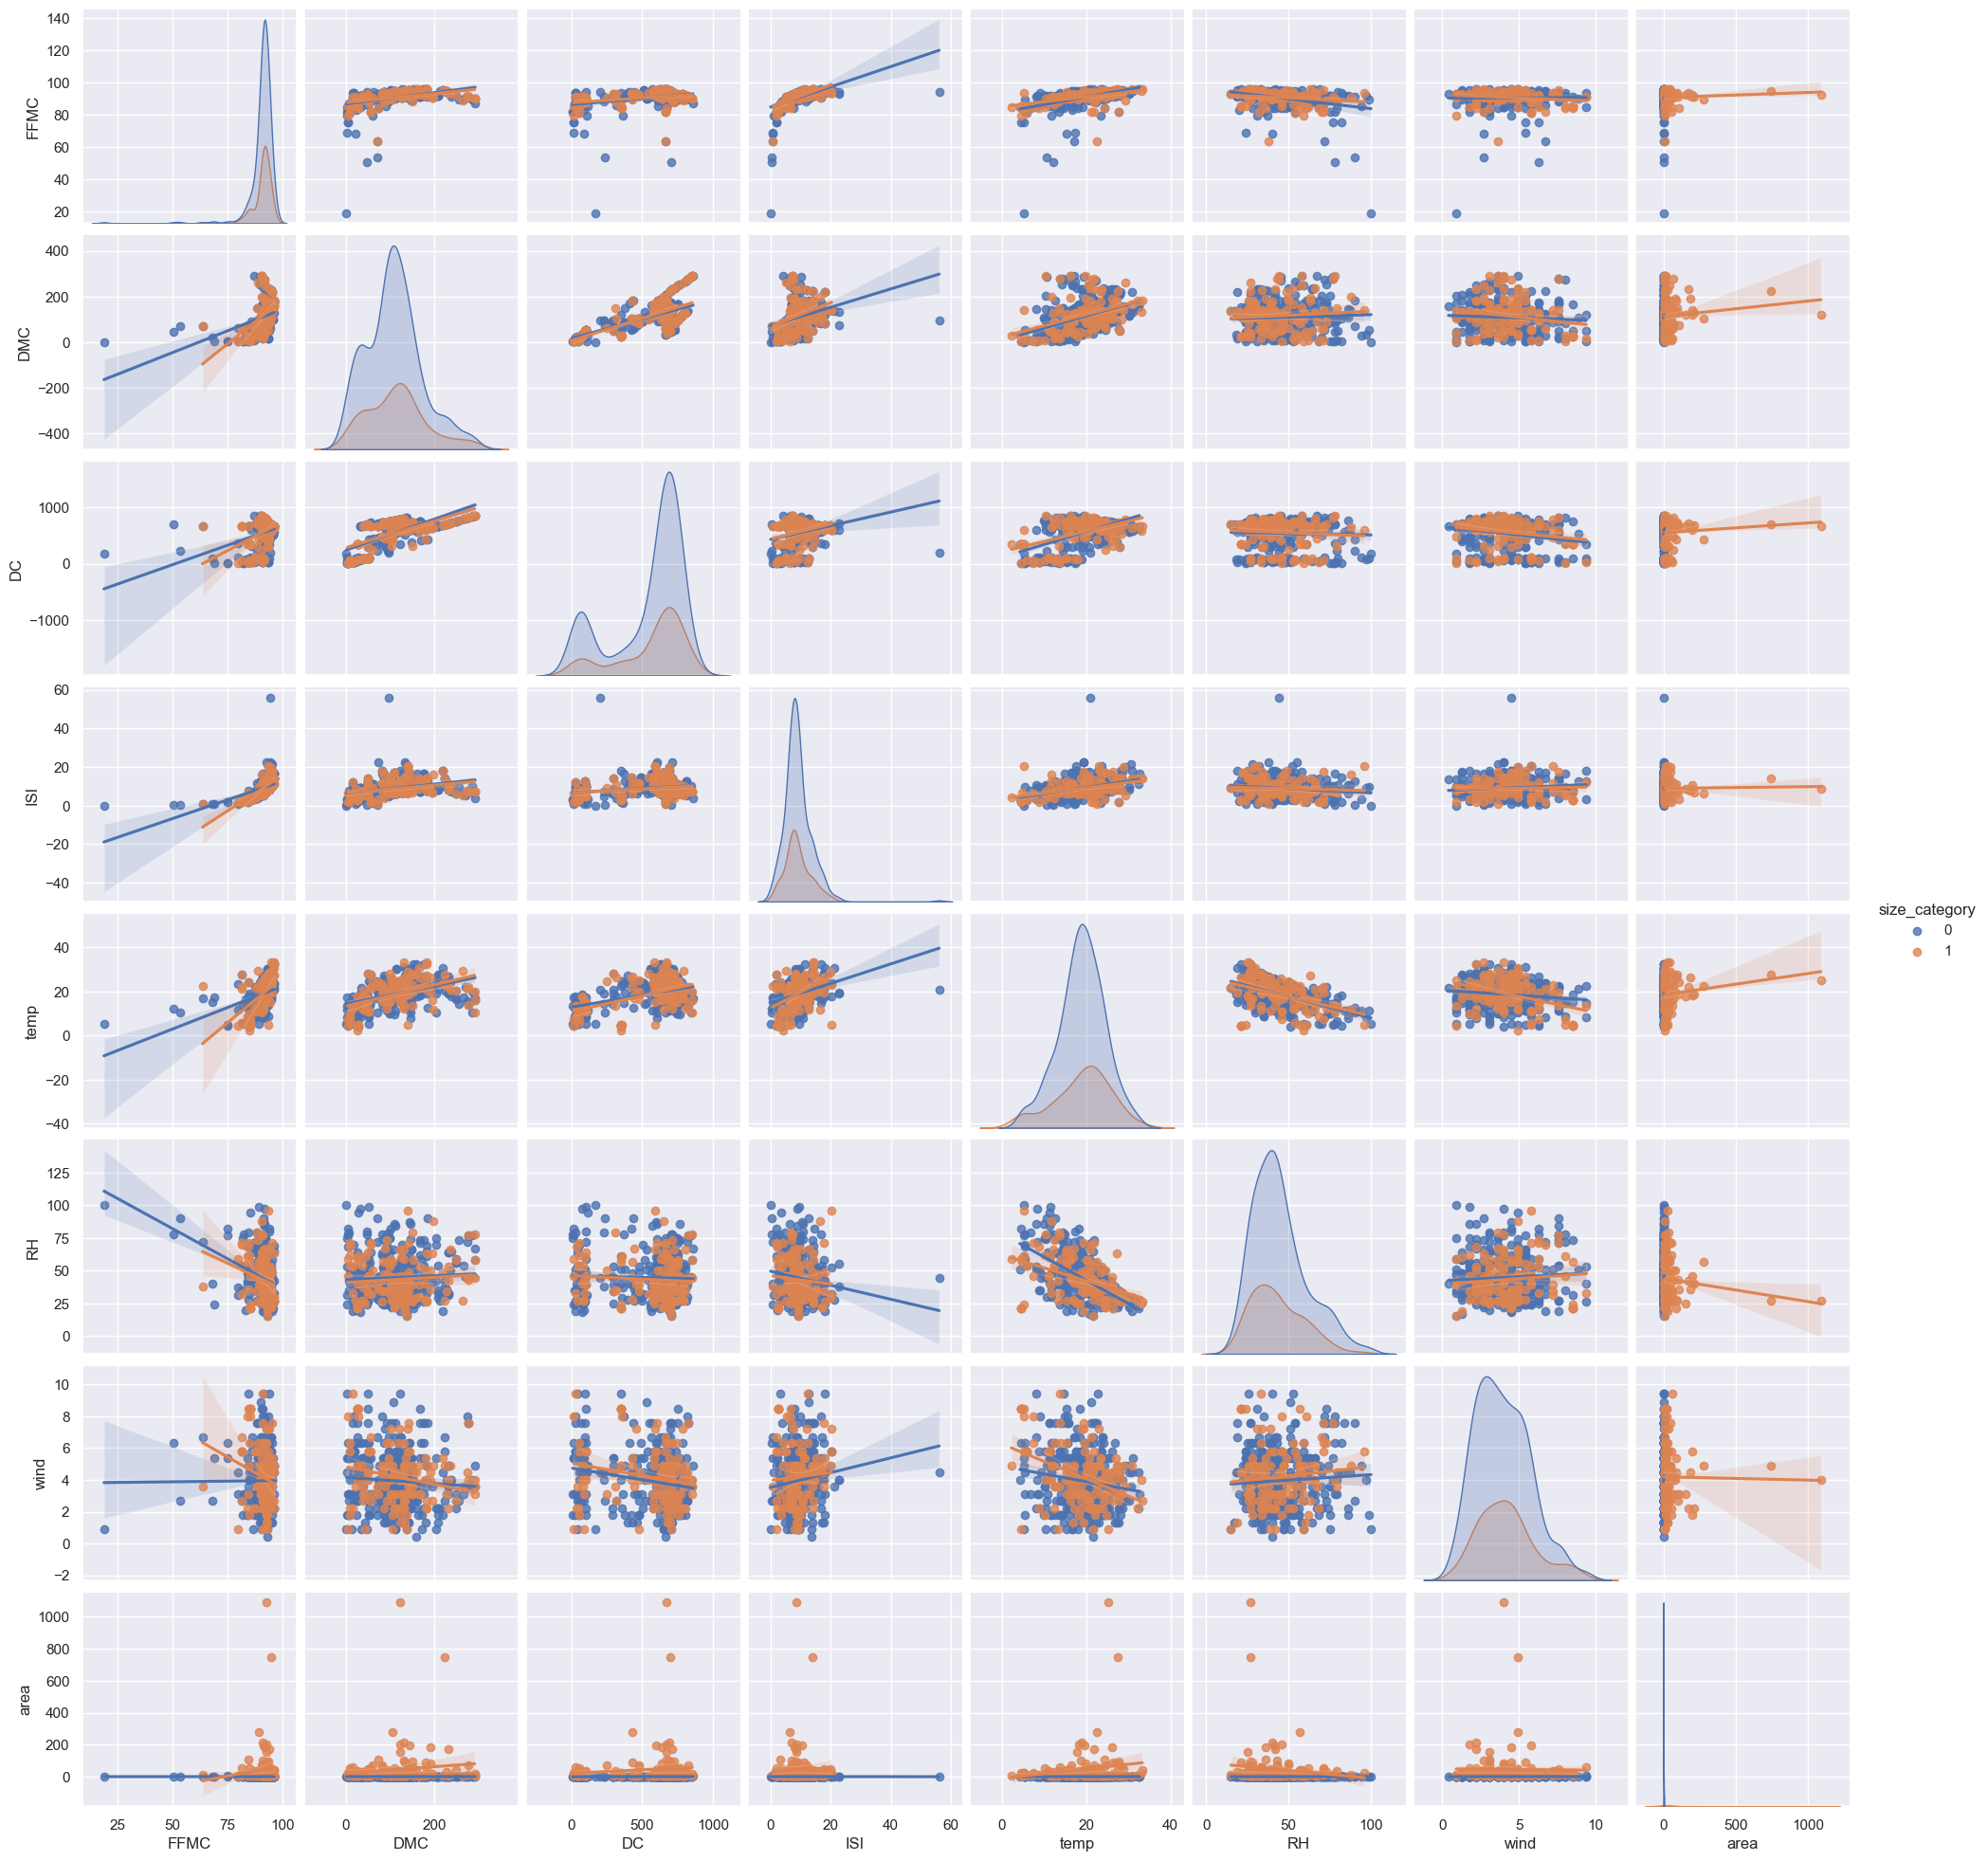

In [34]:
#displaying pairplot to check relationship
sns.pairplot(ff_data,x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'],
             y_vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area'],hue='size_category',
             kind='reg',diag_kind='kde')
plt.show()

<h4>Observations:</h4>
1. Temperature and relative humidity has high collinearity with dependent varible('size_category')<br>
2. deep moist convection (DMC) and temp have relation with each other<br>
3. Most of the independent varibles are skewed to with respect to each others


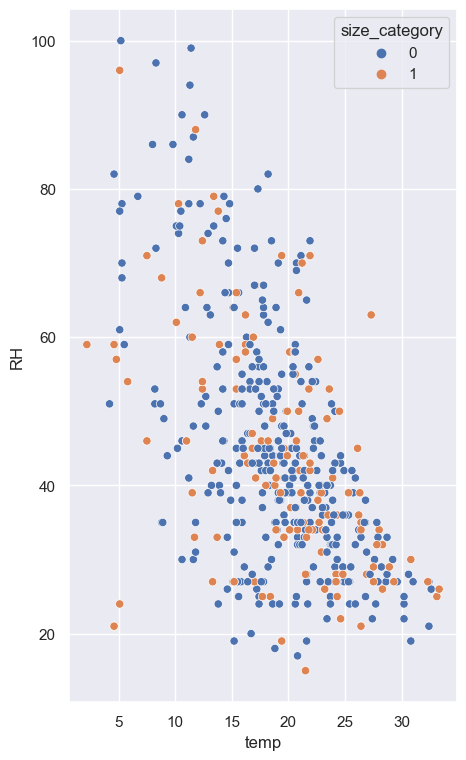

In [35]:
sns.scatterplot(x='temp',y='RH',data=ff_data,hue='size_category')
plt.show()

<h4>Observations:</h4>
1. The RH and temp having negative relation<br>
2. we can see that temperature is incresing the  relative humidity getting drcresing<br>
3. which leds to less number of fires took place

In [36]:
fig = px.scatter(ff_data, x="temp", y="DMC", color='size_category')
fig.show()

<h4>Observations:</h4>
1. The DMC and temp having postive relation<br>
2. we can see that temperature is incresing the  DMC also getting incresing<br>

In [37]:
# importing the modules
from bokeh.palettes import magma
from bokeh.plotting import figure, output_file, show

# file to save the model
output_file("output.html")

# instantiating the figure object
graph = figure(title = "Scatter Plot")

# name of the x-axis
graph.xaxis.axis_label = "Temperature"

# name of the y-axis
graph.yaxis.axis_label = "DC"


# color value of the scatter points
color = magma(256)

x=ff_data['temp']
y=ff_data['DC']
graph.scatter(x, y,color = color)

show(graph)


<img src='bokeh_plot.png'/>

In [38]:
cor = ff_data.corr()
cor

FFMC       DMC        DC       ISI      temp        RH  \
FFMC           1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262   
DMC            0.382925  1.000000  0.681446  0.309459  0.470875  0.062772   
DC             0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971   
ISI            0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955   
temp           0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503   
RH            -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000   
wind          -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721   
rain           0.052280  0.071017  0.033772  0.062132  0.067911  0.094343   
area           0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554   
dayfri         0.020889 -0.011152 -0.001642  0.051599 -0.077766  0.069599   
daymon        -0.057581 -0.105205 -0.053198 -0.159333 -0.135289  0.010311   
daysat        -0.021744 -0.003147 -0.029112 -0.037140  0.038863 -0.024118   
daysun        -0.088579  0.028050 -0.002249 -0.005213  0.015661  0.140341   
daythu         0.073127  0.079932  0.047835 -0.019173  0.051864 -0.128270   
daytue         0.007268 -0.002803  0.026066  0.062274  0.034738 -0.021152   
daywed         0.094854  0.021687  0.022670  0.125896  0.091309 -0.087122   
monthapr      -0.116738 -0.198536 -0.270129 -0.106785 -0.156825  0.021627   
monthaug       0.225720  0.490160  0.270894  0.337101  0.349583  0.046842   
monthdec      -0.136614 -0.177044 -0.106347 -0.162761 -0.329774 -0.047670   
monthfeb      -0.281054 -0.319691 -0.402201 -0.250494 -0.319901  0.141593   
monthjan      -0.455128 -0.106256 -0.115871 -0.103846 -0.146547  0.171900   
monthjul       0.033137  0.000617 -0.101518  0.020932  0.143987  0.013808   
monthjun      -0.041972 -0.047759 -0.178719  0.119765  0.052779  0.014425   
monthmar      -0.074706 -0.404974 -0.648890 -0.143589 -0.342129 -0.083581   
monthmay      -0.036983 -0.082312 -0.115010 -0.060655 -0.045372  0.087384   
monthnov      -0.088879 -0.074642 -0.078927 -0.076748 -0.053720 -0.035967   
monthoct      -0.005172 -0.188126  0.094091 -0.071401 -0.052918 -0.072335   
monthsep       0.080444  0.119779  0.538299 -0.069600  0.091428 -0.061631   
size_category  0.024292  0.046598  0.028372 -0.007867  0.009976 -0.039730   

                   wind      rain      area    dayfri  ...  monthfeb  \
FFMC          -0.030409  0.052280  0.040998  0.020889  ... -0.281054   
DMC           -0.104563  0.071017  0.076932 -0.011152  ... -0.319691   
DC            -0.202856  0.033772  0.051542 -0.001642  ... -0.402201   
ISI            0.104834  0.062132  0.008429  0.051599  ... -0.250494   
temp          -0.227754  0.067911  0.099173 -0.077766  ... -0.319901   
RH             0.070721  0.094343 -0.074554  0.069599  ...  0.141593   
wind           1.000000  0.059332  0.012623  0.121056  ... -0.028820   
rain           0.059332  1.000000 -0.006511 -0.001723  ... -0.013961   
area           0.012623 -0.006511  1.000000 -0.052390  ... -0.021205   
dayfri         0.121056 -0.001723 -0.052390  1.000000  ...  0.047592   
daymon        -0.062712 -0.028473 -0.022178 -0.182056  ...  0.002649   
daysat        -0.068421 -0.030252  0.087647 -0.193432  ...  0.021400   
daysun         0.025971 -0.015749 -0.020657 -0.210075  ...  0.007987   
daythu        -0.055820 -0.025236  0.020685 -0.161357  ... -0.042571   
daytue         0.052331  0.127243 -0.001002 -0.165896  ... -0.014599   
daywed        -0.022181 -0.019189 -0.011046 -0.150484  ... -0.035839   
monthapr       0.048864 -0.009262 -0.008589 -0.018868  ... -0.027133   
monthaug       0.027413  0.088572 -0.000948 -0.100652  ... -0.148305   
monthdec       0.270919 -0.009262  0.000706 -0.018868  ... -0.027133   
monthfeb      -0.028820 -0.013961 -0.021205  0.047592  ...  1.000000   
monthjan      -0.070217 -0.004336 -0.012737 -0.027723  ... -0.012702   
monthjul      -0.039880 -0.012411  0.005566 -0.048598  ... -0.052381   
monthjun       0.010124 -0.012437 -0.019083 -0.01856

<h4>corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.</h4>

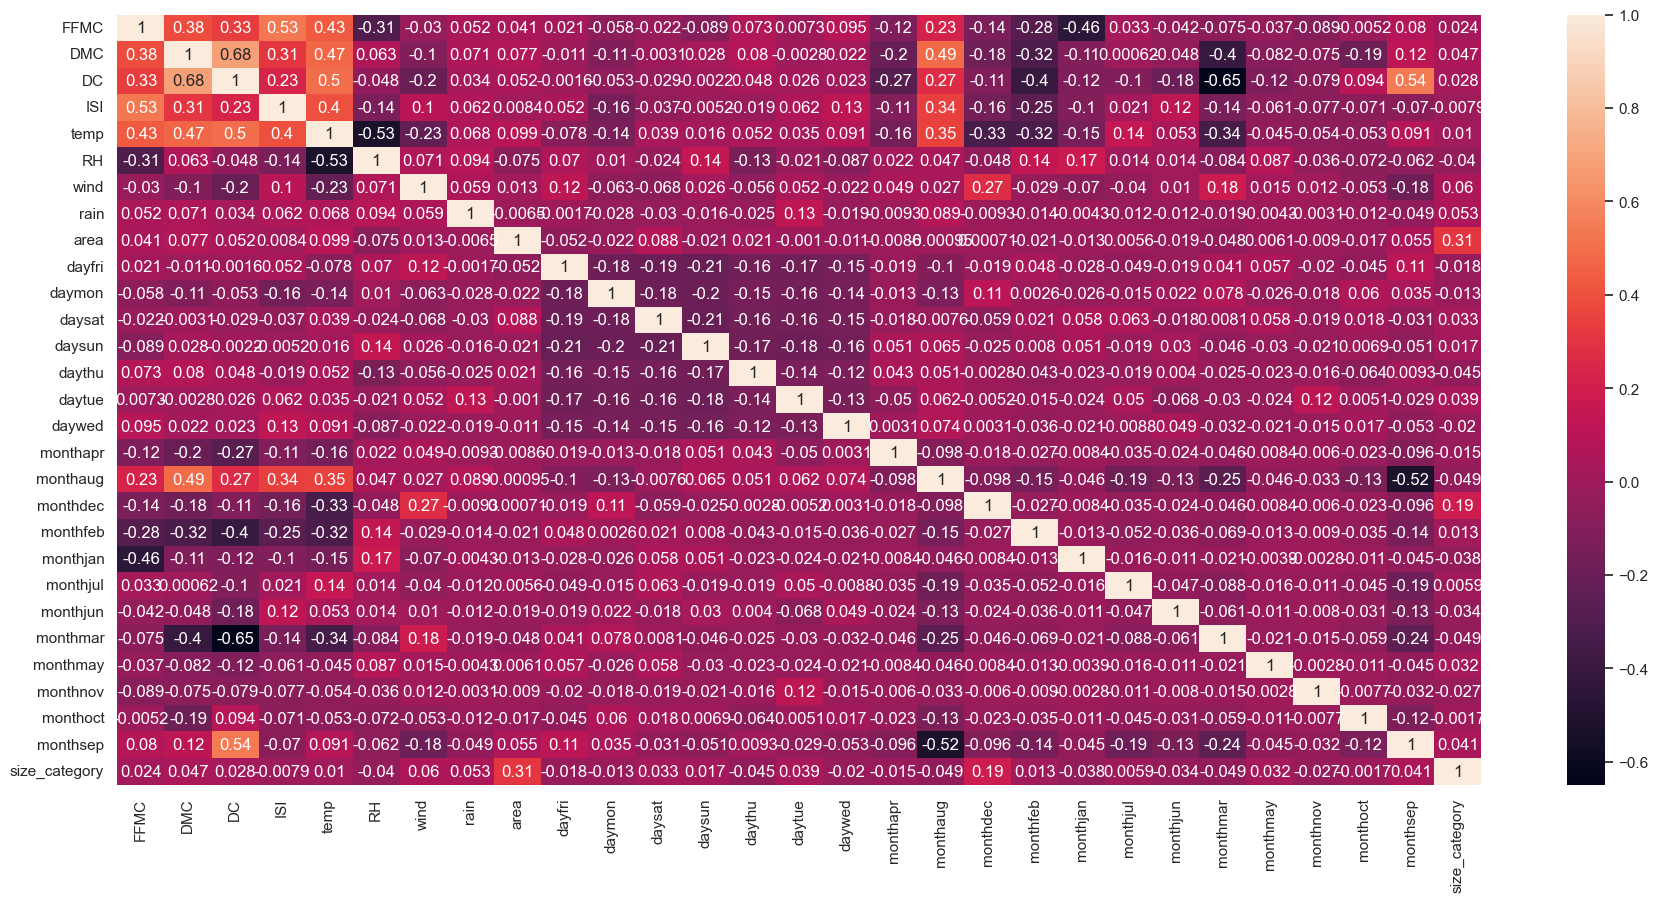

In [39]:
#checking corelation 
plt.figure(figsize=(22,10))
sns.heatmap(cor, annot=True,)
plt.show()

<h4>Observations:</h4>
1. In the heatmap we can see that the highest relationship is between DC and dmc<br>
2. We should focused more on this two fetaures while analysis<br>

In [40]:
X = ff_data.drop('size_category', axis=1)
Y = ff_data[["size_category"]]

## Feature Engineering

### Univariate Feature Selection

In [41]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [42]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [43]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[509 rows x 28 columns]

In [44]:
Y

size_category
0                0
1                0
2                0
3                0
4                0
..             ...
512              1
513              1
514              1
515              0
516              0

[509 rows x 1 columns]

In [45]:
# summarize scores
scores = fit.scores_
features = fit.transform(X)                            

In [46]:
score_df = pd.DataFrame(list(zip(scores, X)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score   Feature
8   0.564001      area
18  0.067024  monthdec
6   0.056319      wind
9   0.042400    dayfri
24  0.040416  monthmay
4   0.027946      temp
5   0.023028        RH
25  0.022054  monthnov
1   0.021493       DMC
10  0.018013    daymon
2   0.016836        DC
21  0.016637  monthjul
12  0.015699    daysun
19  0.014958  monthfeb
14  0.014603    daytue
27  0.009237  monthsep
15  0.008261    daywed
0   0.006816      FFMC
23  0.005657  monthmar
7   0.004762      rain
22  0.002719  monthjun
26  0.000130  monthoct
16  0.000000  monthapr
17  0.000000  monthaug
13  0.000000    daythu
20  0.000000  monthjan
11  0.000000    daysat
3   0.000000       ISI

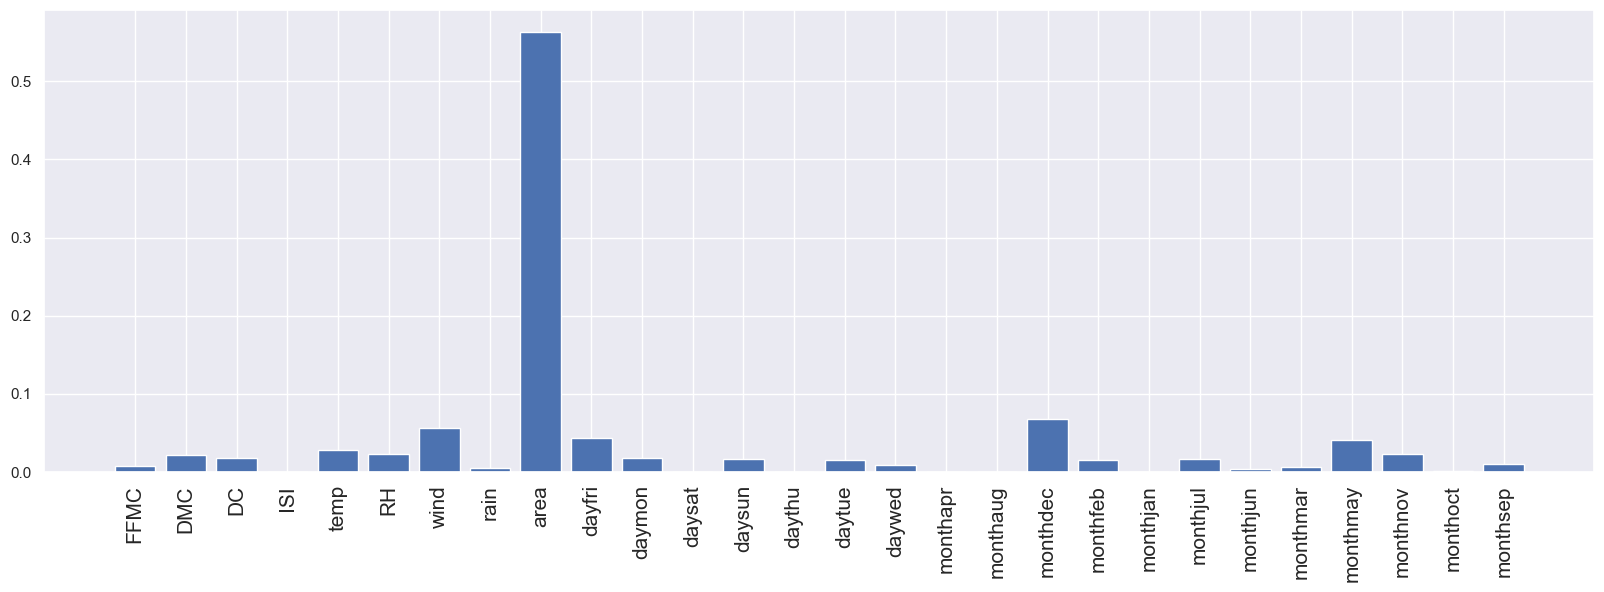

In [47]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([i for i in range(len(X.columns))])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

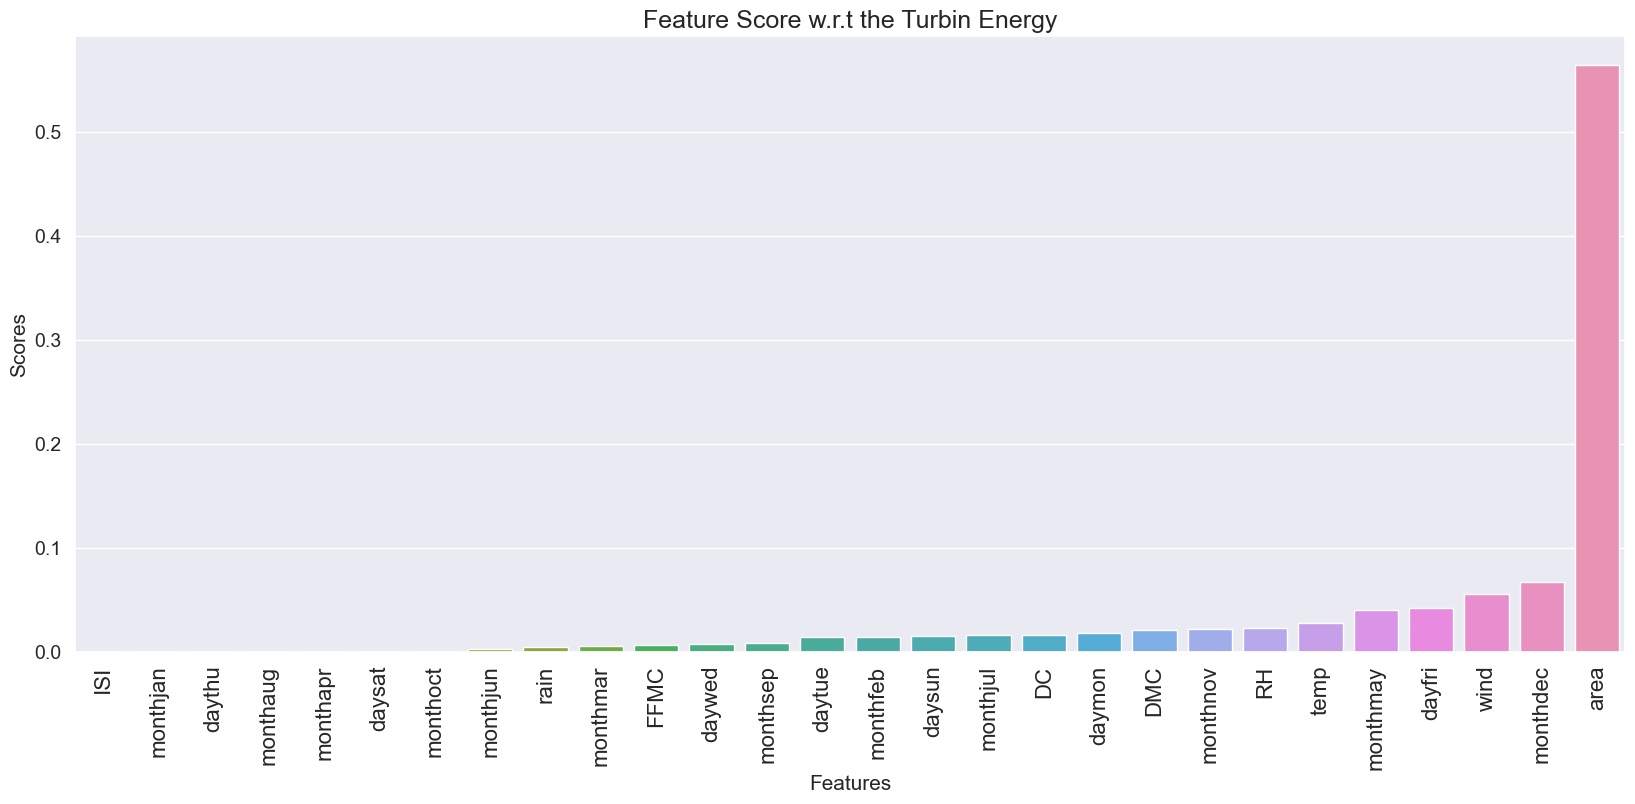

In [48]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Turbin Energy", size=18)
plt.show()

### Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

In [51]:
# Feature Ranking:
fit.ranking_

array([10, 21, 23,  8, 16, 17, 14, 24,  1,  5, 15,  1,  2,  3,  4, 12, 19,
       18,  7,  9, 22,  1, 20, 13, 26, 25, 11,  6])

### Feature Importance using Decision Tree

In [52]:
# Feature Importance with Extra Trees Classifier
from sklearn.tree import  DecisionTreeClassifier

In [53]:
# feature extraction
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [54]:
print(model.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [55]:
df=forest.copy()

In [56]:
model_data=df[['DMC','DC','RH','rain','wind','area','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category']]
model_data

DMC     DC  RH  rain  wind   area  monthapr  monthaug  monthdec  \
0     26.2   94.3  51   0.0   6.7   0.00         0         0         0   
1     35.4  669.1  33   0.0   0.9   0.00         0         0         0   
2     43.7  686.9  33   0.0   1.3   0.00         0         0         0   
3     33.3   77.5  97   0.2   4.0   0.00         0         0         0   
4     51.3  102.2  99   0.0   1.8   0.00         0         0         0   
..     ...    ...  ..   ...   ...    ...       ...       ...       ...   
512   56.7  665.6  32   0.0   2.7   6.44         0         1         0   
513   56.7  665.6  71   0.0   5.8  54.29         0         1         0   
514   56.7  665.6  70   0.0   6.7  11.16         0         1         0   
515  146.0  614.7  42   0.0   4.0   0.00         0         1         0   
516    3.0  106.7  31   0.0   4.5   0.00         0         0         0   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep size_category  
0           0         0         small  
1           1         0         small  
2           1         0         small  
3           0         0         small  
4           0         0         small  
..        ...       ...           ...  
512         0         0         large  
513         0         0         large  
514         0         0         large  
515         0         0         small  
516         0         0         small  

[517 rows x 19 columns]

In [57]:
model_data['size_category']=model_data['size_category'].apply(lambda x: 1 if x=='large' else 0)

In [58]:
model_data.head()

DMC     DC  RH  rain  wind  area  monthapr  monthaug  monthdec  monthfeb  \
0  26.2   94.3  51   0.0   6.7   0.0         0         0         0         0   
1  35.4  669.1  33   0.0   0.9   0.0         0         0         0         0   
2  43.7  686.9  33   0.0   1.3   0.0         0         0         0         0   
3  33.3   77.5  97   0.2   4.0   0.0         0         0         0         0   
4  51.3  102.2  99   0.0   1.8   0.0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0              0  
1         0              0  
2         0              0  
3         0              0  
4         0              0

In [59]:
X = model_data.drop('size_category', axis=1)
Y = model_data[["size_category"]]

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [62]:
X_standardized

array([[-1.32332557, -1.83047676,  0.41172435, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.17954077,  0.48889092, -0.69245628, ..., -0.04402255,
         5.78503817, -0.70608125],
       [-1.04982188,  0.56071545, -0.69245628, ..., -0.04402255,
         5.78503817, -0.70608125],
       ...,
       [-0.84664771,  0.47476811,  1.57724834, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.54900254,  0.26938221, -0.14036597, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [-1.68591332, -1.78044169, -0.81514302, ..., 22.71563338,
        -0.17285971, -0.70608125]])

In [63]:
Y

size_category
0                0
1                0
2                0
3                0
4                0
..             ...
512              1
513              1
514              1
515              0
516              0

[517 rows x 1 columns]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_standardized,Y,test_size=0.3,random_state=50, stratify=Y)

In [65]:
X_train.shape

(361, 18)

### Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

In [66]:
# !pip install tensorflow
# !pip install keras

In [67]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [68]:
X_train

array([[ 2.14938984,  0.83066274,  0.71844119, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.17391177,  0.97552234, -0.14036597, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [-1.67497317, -2.17345911,  2.06799529, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [-0.03863967,  0.87182062, -0.56976954, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.56931996,  0.2685752 , -0.0790226 , ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 2.54636091,  1.09415388,  1.69993508, ..., -0.04402255,
        -0.17285971, -0.70608125]])

In [69]:
y_train

size_category
454              0
360              0
104              0
125              0
327              0
..             ...
42               0
365              1
338              1
73               0
459              0

[361 rows x 1 columns]

### Tuning of Hyperparameters : Batch Size and Epochs

The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

In [70]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(12,input_dim=18,activation='relu'))
    model1.add(Dense(8,activation='relu'))
    model1.add(Dense(4,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [71]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [72]:
grid_result = grid.fit(X_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.844 total time=  11.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.742 total time=   4.0s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   4.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.806 total time=   3.9s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   4.4s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.806 total time=   3.0s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................
[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.710 total time=   2.7s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.742 total time=   2.6s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.906 total time=   3.9s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.774 total time=   4.8s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.806 total time=   3.7s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch

In [73]:
# Summarize the results
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9036290287971497, using {'batch_size': 10, 'epochs': 100}
0.8268145203590394,0.0485899627406149 with {'batch_size': 10, 'epochs': 10}
0.8649193525314331,0.04346617257411215 with {'batch_size': 10, 'epochs': 50}
0.9036290287971497,0.04112904013372003 with {'batch_size': 10, 'epochs': 100}
0.9036290168762207,0.03571225120618406 with {'batch_size': 10, 'epochs': 200}
0.7955645084381103,0.08035836427069584 with {'batch_size': 20, 'epochs': 10}
0.8971774101257324,0.05578522731953586 with {'batch_size': 20, 'epochs': 50}
0.9036290287971497,0.05793555615528261 with {'batch_size': 20, 'epochs': 100}
0.8903225779533386,0.05624386112950945 with {'batch_size': 20, 'epochs': 200}
0.7368951559066772,0.05654515124626018 with {'batch_size': 40, 'epochs': 10}
0.8135080575942993,0.0485631947847593 with {'batch_size': 40, 'epochs': 50}
0.9036290287971497,0.04112904013372003 with {'batch_size': 40, 'epochs': 100}
0.8844757914543152,0.026284014318176452 with {'batch_size': 40, 'epochs': 200}
0.7245

### Tuning of Hyperparameters : Learning rate and Drop out rate

Learning rate dropout (LRD) is a new gradient descent technique to motivate faster convergence and better generalization. LRD aids the optimizer to actively explore in the parameter space by randomly dropping some learning rates (to 0); at each iteration, only parameters whose learning rate is not 0 are updated.

In [74]:
from keras.layers import Dropout
from keras.optimizers import adam_v2
# Defining the model

def create_model(dropout_rate,learning_rate):
    model2 = Sequential()
    model2.add(Dense(12,input_dim=18,activation='relu'))
    model2.add(Dense(8,activation='relu'))
    model2.add(Dense(4,activation='relu'))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [75]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
learning_rate = [0.001,0.01,0.1]
param_grid=dict(dropout_rate=dropout_rate,learning_rate = learning_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [76]:
grid_result2 = grid2.fit(X_test,y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.969 total time=   8.3s
[CV 2/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.774 total time=  13.4s
[CV 3/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 3/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.871 total time=  13.4s
[CV 4/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 4/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.903 total time=   7.3s
[CV 5/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 5/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.968 total time=  12.5s
[CV 1/5; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV

[CV 4/5; 10/18] END dropout_rate=0.3, learning_rate=0.001;, score=0.871 total time=  12.5s
[CV 5/5; 10/18] START dropout_rate=0.3, learning_rate=0.001.....................
[CV 5/5; 10/18] END dropout_rate=0.3, learning_rate=0.001;, score=0.968 total time=  10.8s
[CV 1/5; 11/18] START dropout_rate=0.3, learning_rate=0.01......................
[CV 1/5; 11/18] END dropout_rate=0.3, learning_rate=0.01;, score=0.969 total time=  10.8s
[CV 2/5; 11/18] START dropout_rate=0.3, learning_rate=0.01......................
[CV 2/5; 11/18] END dropout_rate=0.3, learning_rate=0.01;, score=0.871 total time=  13.9s
[CV 3/5; 11/18] START dropout_rate=0.3, learning_rate=0.01......................
[CV 3/5; 11/18] END dropout_rate=0.3, learning_rate=0.01;, score=0.903 total time=  14.1s
[CV 4/5; 11/18] START dropout_rate=0.3, learning_rate=0.01......................
[CV 4/5; 11/18] END dropout_rate=0.3, learning_rate=0.01;, score=0.839 total time=  10.7s
[CV 5/5; 11/18] START dropout_rate=0.3, learning_rate

In [77]:
# Summarize the results
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9292338609695434, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8969757914543152,0.07204213453313554 with {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8780241966247558,0.08281849458656465 with {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9096773982048034,0.0657938063971861 with {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8973790287971497,0.02433092480262128 with {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8907257914543152,0.03345559767063152 with {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9229838609695434,0.01614919473208443 with {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9292338609695434,0.05564078892139552 with {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9034274101257325,0.06141884043614496 with {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8911290168762207,0.04342874244632797 with {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.9229838609695434,0.03306451047339368 with {'dropout_rate': 0.3, 'learning_rate': 0.001}
0.9034274101257325,0.045905808301

### Tuning of Hyperparameters : Activation Function and Kernel Initializer

 The activation function compares the input value to a threshold value. If the input value is greater than the threshold value, the neuron is activated. Kernel Initializers are also known as weight initializers as their main task is to initialize the weights of a neural network

In [78]:
# Defining the model

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(12,input_dim=18,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(8,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(4,activation="relu"))
    model3.add(Dropout(0.01))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3


In [79]:
# Create the model

model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [80]:
grid_result3 = grid3.fit(X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.969 total time=  11.7s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.903 total time=  14.4s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.935 total time=  11.4s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.839 total time=  11.3s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=  11.5s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [81]:
# Summarize the results
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.935887086391449, using {'activation_function': 'softmax', 'init': 'zero'}
0.9292338609695434,0.05564078892139552 with {'activation_function': 'softmax', 'init': 'normal'}
0.903830635547638,0.04563582649295262 with {'activation_function': 'softmax', 'init': 'uniform'}
0.935887086391449,0.045626918602768914 with {'activation_function': 'softmax', 'init': 'zero'}
0.9100806474685669,0.0518203976985741 with {'activation_function': 'tanh', 'init': 'normal'}
0.9098790168762207,0.043069736187499874 with {'activation_function': 'tanh', 'init': 'uniform'}
0.8969758033752442,0.03799961758384321 with {'activation_function': 'tanh', 'init': 'zero'}
0.9294354677200317,0.037696772172982895 with {'activation_function': 'relu', 'init': 'normal'}
0.9098790168762207,0.05184079028729416 with {'activation_function': 'relu', 'init': 'uniform'}
0.9165322422981262,0.043942367559126616 with {'activation_function': 'relu', 'init': 'zero'}


### Tuning of Hyperparameter : Number of Neurons in activation layer

The number of neurons range is set to be from 10 to 100. An activation function is a parameter in each layer. Input data are fed to the input layer, followed by hidden layers, and the final output layer

In [82]:
# Defining the model

def create_model(neuron1,neuron2,neuron3):
    model4 = Sequential()
    model4.add(Dense(neuron1,input_dim = 18,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.01)
    model4.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model4


In [83]:
# Create the model

model4=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
neuron1 = [8,16,24]
neuron2 = [4,8,16]
neuron3 = [2,4,8]
param_grid=dict(neuron1 = neuron1,neuron2 = neuron2,neuron3 = neuron3)
grid4 = GridSearchCV(estimator=model4,param_grid=param_grid,cv=KFold(),verbose=10)


In [84]:
grid_result4 = grid4.fit(X_test,y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=8, neuron2=4, neuron3=2............................
[CV 1/5; 1/27] END neuron1=8, neuron2=4, neuron3=2;, score=0.938 total time=  14.0s
[CV 2/5; 1/27] START neuron1=8, neuron2=4, neuron3=2............................
[CV 2/5; 1/27] END neuron1=8, neuron2=4, neuron3=2;, score=0.871 total time=  10.9s
[CV 3/5; 1/27] START neuron1=8, neuron2=4, neuron3=2............................
[CV 3/5; 1/27] END neuron1=8, neuron2=4, neuron3=2;, score=0.968 total time=  14.0s
[CV 4/5; 1/27] START neuron1=8, neuron2=4, neuron3=2............................
[CV 4/5; 1/27] END neuron1=8, neuron2=4, neuron3=2;, score=0.968 total time=  13.8s
[CV 5/5; 1/27] START neuron1=8, neuron2=4, neuron3=2............................
[CV 5/5; 1/27] END neuron1=8, neuron2=4, neuron3=2;, score=1.000 total time=  12.2s
[CV 1/5; 2/27] START neuron1=8, neuron2=4, neuron3=4............................
[CV 1/5; 2/27] END neuron1=8, ne

[CV 5/5; 10/27] END neuron1=16, neuron2=4, neuron3=2;, score=1.000 total time=  14.0s
[CV 1/5; 11/27] START neuron1=16, neuron2=4, neuron3=4..........................
[CV 1/5; 11/27] END neuron1=16, neuron2=4, neuron3=4;, score=0.938 total time=  14.2s
[CV 2/5; 11/27] START neuron1=16, neuron2=4, neuron3=4..........................
[CV 2/5; 11/27] END neuron1=16, neuron2=4, neuron3=4;, score=0.903 total time=  14.0s
[CV 3/5; 11/27] START neuron1=16, neuron2=4, neuron3=4..........................
[CV 3/5; 11/27] END neuron1=16, neuron2=4, neuron3=4;, score=0.935 total time=  13.9s
[CV 4/5; 11/27] START neuron1=16, neuron2=4, neuron3=4..........................
[CV 4/5; 11/27] END neuron1=16, neuron2=4, neuron3=4;, score=0.968 total time=  15.0s
[CV 5/5; 11/27] START neuron1=16, neuron2=4, neuron3=4..........................
[CV 5/5; 11/27] END neuron1=16, neuron2=4, neuron3=4;, score=0.968 total time=  12.1s
[CV 1/5; 12/27] START neuron1=16, neuron2=4, neuron3=8.........................

[CV 4/5; 20/27] END neuron1=24, neuron2=4, neuron3=4;, score=0.968 total time=  11.7s
[CV 5/5; 20/27] START neuron1=24, neuron2=4, neuron3=4..........................
[CV 5/5; 20/27] END neuron1=24, neuron2=4, neuron3=4;, score=1.000 total time=  11.6s
[CV 1/5; 21/27] START neuron1=24, neuron2=4, neuron3=8..........................
[CV 1/5; 21/27] END neuron1=24, neuron2=4, neuron3=8;, score=0.969 total time=  11.5s
[CV 2/5; 21/27] START neuron1=24, neuron2=4, neuron3=8..........................
[CV 2/5; 21/27] END neuron1=24, neuron2=4, neuron3=8;, score=0.871 total time=  13.6s
[CV 3/5; 21/27] START neuron1=24, neuron2=4, neuron3=8..........................
[CV 3/5; 21/27] END neuron1=24, neuron2=4, neuron3=8;, score=0.935 total time=  12.2s
[CV 4/5; 21/27] START neuron1=24, neuron2=4, neuron3=8..........................
[CV 4/5; 21/27] END neuron1=24, neuron2=4, neuron3=8;, score=0.968 total time=  12.0s
[CV 5/5; 21/27] START neuron1=24, neuron2=4, neuron3=8.........................

In [85]:
# Summarize the results
print('Best {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means = grid_result4.cv_results_["mean_test_score"]
stds = grid_result4.cv_results_["std_test_score"]
params = grid_result4.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.96794353723526, using {'neuron1': 8, 'neuron2': 16, 'neuron3': 4}
0.9487903118133545,0.04364534564430108 with {'neuron1': 8, 'neuron2': 4, 'neuron3': 2}
0.9423386931419373,0.03755849447988472 with {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
0.9487903118133545,0.04364536326569921 with {'neuron1': 8, 'neuron2': 4, 'neuron3': 8}
0.9487903118133545,0.032748295132115426 with {'neuron1': 8, 'neuron2': 8, 'neuron3': 2}
0.9294354796409607,0.04286349347749902 with {'neuron1': 8, 'neuron2': 8, 'neuron3': 4}
0.9550403118133545,0.032978355574424925 with {'neuron1': 8, 'neuron2': 8, 'neuron3': 8}
0.9487903118133545,0.032748295132115426 with {'neuron1': 8, 'neuron2': 16, 'neuron3': 2}
0.96794353723526,0.035339249593106664 with {'neuron1': 8, 'neuron2': 16, 'neuron3': 4}
0.9487903118133545,0.04364536326569921 with {'neuron1': 8, 'neuron2': 16, 'neuron3': 8}
0.9487903118133545,0.04364534564430108 with {'neuron1': 16, 'neuron2': 4, 'neuron3': 2}
0.9423386931419373,0.024045240840150032 with {'neur

In [86]:
def toFindBestParams(X_train, y_train, X_test, y_test):
    #print(y_test.shape)
    #sys.exit()
    
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(X_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(X_train, y_train, X_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.81717449426651
batch_size: 5 - epochs: 10 Accuracy: 0.9252077341079712
batch_size: 5 - epochs: 50 Accuracy: 0.9722991585731506
batch_size: 5 - epochs: 100 Accuracy: 0.9861496090888977
batch_size: 10 - epochs: 5 Accuracy: 0.7811634540557861
batch_size: 10 - epochs: 10 Accuracy: 0.861495852470398
batch_size: 10 - epochs: 50 Accuracy: 0.9778393507003784
batch_size: 10 - epochs: 100 Accuracy: 0.9889196753501892
batch_size: 15 - epochs: 5 Accuracy: 0.7673130035400391
batch_size: 15 - epochs: 10 Accuracy: 0.7977839112281799
batch_size: 15 - epochs: 50 Accuracy: 0.9750692248344421
batch_size: 15 - epochs: 100 Accuracy: 0.9722991585731506
batch_size: 20 - epochs: 5 Accuracy: 0.7645429372787476
batch_size: 20 - epochs: 10 Accuracy: 0.7839335203170776
batch_size: 20 - epochs: 50 Accuracy: 0.9778393507003784
batch_size: 20 - epochs: 100 Accuracy: 0.9889196753501892


### Training model with optimum values of Hyperparameters

The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

In [87]:
#create ANN model

model = Sequential()
model.add(Dense(24,input_dim = 18,kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,input_dim = 18,kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,input_dim = 18,kernel_initializer = 'normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal',activation = 'sigmoid'))
    
adam = adam_v2.Adam(lr = 0.01)
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])



In [88]:
model.summary()

Model: "sequential_370"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1328 (Dense)          (None, 24)                456       
                                                                 
 dropout_410 (Dropout)       (None, 24)                0         
                                                                 
 dense_1329 (Dense)          (None, 8)                 200       
                                                                 
 dropout_411 (Dropout)       (None, 8)                 0         
                                                                 
 dense_1330 (Dense)          (None, 8)                 72        
                                                                 
 dropout_412 (Dropout)       (None, 8)                 0         
                                                                 
 dense_1331 (Dense)          (None, 1)              

In [89]:
# Training the model with best parameters
history = model.fit(X_train, y_train, validation_split=0.3, batch_size = 20, epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 49ms/step - loss: 0.6809 - accuracy: 0.6706 - val_loss: 0.6552 - val_accuracy: 0.7982
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 0.6582 - accuracy: 0.7024 - val_loss: 0.6081 - val_accuracy: 0.7982
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 0.6285 - accuracy: 0.7024 - val_loss: 0.5183 - val_accuracy: 0.7982
Epoch 4/100
13/13 [==============================] - 0s 14ms/step - loss: 0.5867 - accuracy: 0.7024 - val_loss: 0.4971 - val_accuracy: 0.7982
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 0.5596 - accuracy: 0.7024 - val_loss: 0.4613 - val_accuracy: 0.7982
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5216 - accuracy: 0.7024 - val_loss: 0.4154 - val_accuracy: 0.7982
Epoch 7/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4884 - accuracy: 0.7024 - val_loss: 0.3704 - val_accuracy: 0.7982
Epoch 

13/13 [==============================] - 0s 16ms/step - loss: 0.0977 - accuracy: 0.9683 - val_loss: 0.2224 - val_accuracy: 0.9266
Epoch 59/100
13/13 [==============================] - 0s 15ms/step - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.2679 - val_accuracy: 0.9358
Epoch 60/100
13/13 [==============================] - 0s 16ms/step - loss: 0.1839 - accuracy: 0.9444 - val_loss: 0.2874 - val_accuracy: 0.9358
Epoch 61/100
13/13 [==============================] - 0s 15ms/step - loss: 0.1557 - accuracy: 0.9603 - val_loss: 0.1402 - val_accuracy: 0.9358
Epoch 62/100
13/13 [==============================] - 0s 19ms/step - loss: 0.1200 - accuracy: 0.9643 - val_loss: 0.2077 - val_accuracy: 0.9174
Epoch 63/100
13/13 [==============================] - 0s 18ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.1988 - val_accuracy: 0.9266
Epoch 64/100
13/13 [==============================] - 0s 20ms/step - loss: 0.1048 - accuracy: 0.9643 - val_loss: 0.1690 - val_accuracy: 0.9358
Epoch 65/100

In [90]:
model.weights

[<tf.Variable 'dense_1328/kernel:0' shape=(18, 24) dtype=float32, numpy=
 array([[ 7.76565671e-02, -1.01938434e-02, -7.40743279e-02,
          7.92017393e-03, -4.85619865e-02,  1.68080945e-02,
         -2.20685557e-01,  1.12426095e-02,  7.68743604e-02,
          2.04987433e-02,  2.20488936e-01,  1.50910527e-01,
         -4.99858614e-03, -2.49485746e-01,  1.41712338e-01,
          4.97078821e-02,  2.02833824e-02, -9.96400118e-02,
          1.24300905e-01, -4.58680481e-01,  1.39197513e-01,
         -1.53444231e-01, -6.63451031e-02, -3.33014391e-02],
        [-4.67809336e-03, -1.10186107e-01, -1.38054088e-01,
          1.29630908e-01, -6.90120906e-02,  2.36200184e-01,
          2.11968590e-02, -3.55519019e-02,  1.67876363e-01,
          1.55817568e-01, -7.28578269e-02,  3.68165858e-02,
         -7.69278333e-02,  2.30013346e-03,  1.26108766e-01,
         -7.61831626e-02,  1.83732416e-02,  3.44392449e-01,
          6.78094029e-02,  2.75420249e-01,  7.12918490e-02,
          5.53210042e-02, 

In [91]:
# evaluate the model
scores = model.evaluate(X_standardized,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 5ms/step - loss: 0.5680 - accuracy: 0.9652
accuracy: 96.52%


In [92]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

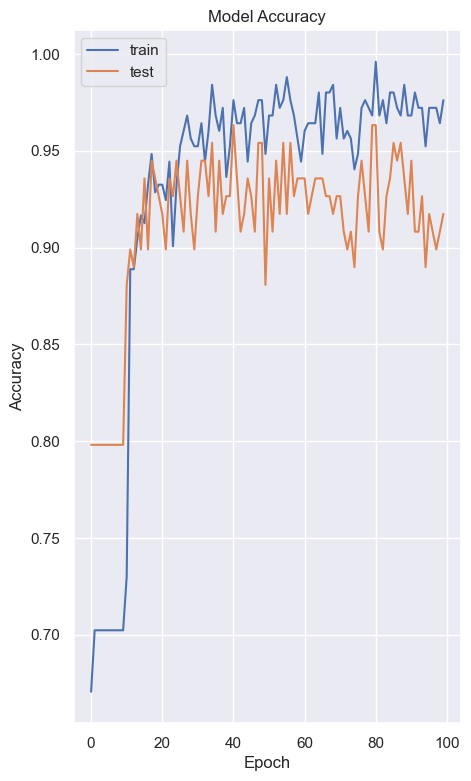

In [93]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

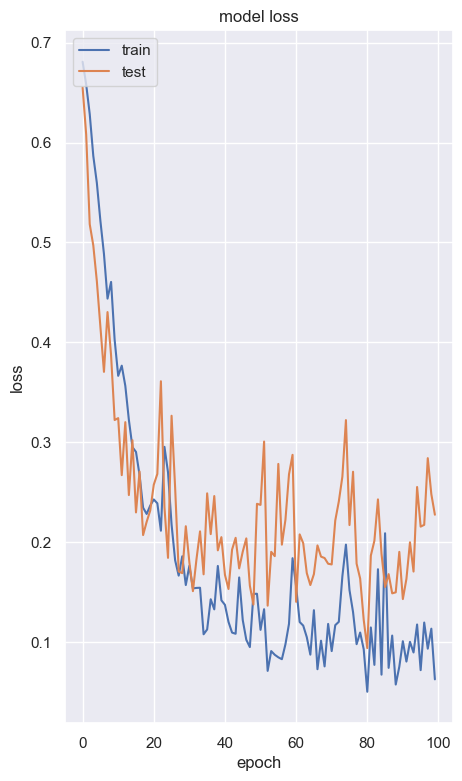

In [94]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training-error converged but the testing error didn't converge and conincide with the training error . Hence, We can do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

## Predicting values from Model using same dataset

In [95]:
# generating predictions for test data
y_predict_test = model.predict(X_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 1s 7ms/step
(156, 3)


Test_Actual  Test_Probability  Test_Predicted
220            1      9.325364e-01               1
71             0      7.817644e-11               0
379            0      0.000000e+00               0
393            0      1.550683e-20               0
330            1      9.032744e-01               1
6              0      2.143711e-08               0
485            0      9.718129e-06               0
308            0      1.074071e-09               0
95             0      2.326343e-11               0
460            0      4.802069e-07               0

In [96]:
# generating predictions for train data
y_predict_train = model.predict(X_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 5ms/step
(361, 3)


Train_Actual  Train_Probability  Train_Predicted
454             0       2.848951e-08                0
360             0       9.452726e-08                0
104             0       0.000000e+00                0
125             0       5.186563e-10                0
327             0       4.463243e-09                0
169             0       5.512125e-06                0
333             0       3.766431e-06                0
453             0       5.941554e-08                0
477             1       9.303899e-01                1
201             1       9.320746e-01                1

## Classification Report

In [97]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       114
           1       0.97      0.86      0.91        42

    accuracy                           0.96       156
   macro avg       0.96      0.92      0.94       156
weighted avg       0.96      0.96      0.95       156



In [98]:
# print the classification report
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       264
           1       0.92      0.97      0.94        97

    accuracy                           0.97       361
   macro avg       0.95      0.97      0.96       361
weighted avg       0.97      0.97      0.97       361



In [99]:
# print the scores on training and test set
y_predict_test = model.predict(X_test) 
y_predict_train = model.predict(X_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 6ms/step
Training set score: 96.95%
Test set score: 95.51%


<h3>Insights:</h3>
<br>
We have Predict the Burned Area of Forest Fire with Neural Networks. <br>
we have used model validation techniques, feature engineering<br>
we done optimization for getting more accuracy <br>
first we tunned hypermeters separately for checking which are the best scores and best parameters<br>
Then, at the final we trained model with optimum values of Hyperparameters<br>
We got the <b>Train Accuracy :  96.95% </b> and <b>Test Accuracy :  95.51%</b>